In [1]:
%config Completer.use_jedi=False

import sys
sys.path.append('../../')

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import rankdata

from examples.commonutils.simutils import set_stoechimetry_step_type,get_stoechimetry_step_type 
from refsimu import build_and_run_simu
from refsimu import microbe_pop_on
def get_line_type(fname):
    if (fname in ['microbes','monomers','substrates','degradation_enzymes']):
        res = '-'
    else:
        res = '--'
    return res

In [2]:
microbe_pop_on() # switch to new model for microbes taking account of number of individuals. 

Microbe quantization True


In [3]:
litter_names =['DementDefault','Boreal','Desert','Grassland','PineOak','Scrubland','Subalpine']
subst_descs_single = { k.upper():{'name':k.upper(),'steps':[(k,'inf')]}
                              for k in litter_names
                          }

In [4]:
grid_shape = (32,32)
n_degrad_enzymes = 12
n_taxa = 100
n_osmolytes = 1
n_years = 5
n_steps = 365 * n_years-1
# n_steps = 10
num_threads = 1

case_parameters = {
               'substrate_inputs' : {'name':'TESTINPPUT','steps':[('DementDefault','inf')]},
               'initial_diversity':'uniform',
               'selected_tax': None,
               'mutation_rate': 0.005,#0.005,
               'mutation_type': 'two', # set to 'one' for only 1 mutating daughter (old version)
               'disp_proba0': 0.8,
               'boundary_flux':True,
               'diagnostic_period_day':1,
               }
run_seeds = {
        'microbes_mortality': 42,
        'microbes_dispersal': 5,
        'microbes_mutation': 0,
        }

In [5]:
eco, diagcollector = build_and_run_simu(grid_shape,
                                        n_degrad_enzymes,n_taxa,n_osmolytes,n_steps,
                                        run_seeds=run_seeds,
                                        with_diags=True,
                                        save_fields=False,
                                        save_diags=True,
                                        save_dir = './simutest_interactive_{}'.format(case_parameters["substrate_inputs"]["name"]),
                                        num_threads=num_threads,
                                        case_parameters=case_parameters,
                                        )

CASE PARAMETERS
substrate_inputs {'name': 'TESTINPPUT', 'steps': [('DementDefault', 'inf')]}
initial_diversity uniform
selected_tax None
mutation_rate 0.005
mutation_type two
disp_proba0 0.8
boundary_flux True
diagnostic_period_day 1
degenz (100, 12)
Using run seeds {'microbes_mortality': 42, 'microbes_dispersal': 5, 'microbes_mutation': 0}
Starting simulation
Number of threads Required 1 Available 8 Provided 1
Detailed Timings for step 0
monomer diffusion: 0.00022919598268344998 s (0.02%)
substrate degradation: 0.03161139803705737 s (2.49%)
uptake only: 0.03448650398058817 s (2.71%)
metabolic inducible: 0.8110271379700862 s (63.80%)
metabolic constitutive: 0.1956964849960059 s (15.40%)
Quantized birth/mutation: 0.0439810860552825 s (3.46%)
mortality + stoechiomoetry: 0.045670563995372504 s (3.59%)
Linear decay (monomers, enzymes): 0.025499394978396595 s (2.01%)
Microbial dispersal: 0.05712256202241406 s (4.49%)
external sources: 0.0005474129575304687 s (0.04%)
diagnostics: 0.025277603

In [6]:
tla_comp_space = diagcollector.get_timeline_arrays('space_comp_sum', tag_filter_func= lambda t: 'pool' in t and 'input' not in t)
tla_comp_space_external =  diagcollector.get_timeline_arrays('space_comp_sum', tag_filter_func= lambda t: 'pool' in t and 'input'  in t)
tla_recycling = diagcollector.get_timeline_arrays('space_comp_sum',tag_filter_func=lambda t:'stoechio_balance_recycler' in t)
tla_mortality = diagcollector.get_timeline_arrays('space_comp_sum',tag_filter_func=lambda t:'mortality_op' in t)
tla_bytype = diagcollector.get_timeline_arrays('sum_by_type')
tla_ncells = diagcollector.get_timeline_arrays('ncells')
tla_sub = diagcollector.get_timeline_arrays('space_sum',tag_filter_func=lambda t:'substrates' in t)
tla_enz = diagcollector.get_timeline_arrays('space_sum',tag_filter_func=lambda t:'degradation_enzymes' in t)
tla_mon = diagcollector.get_timeline_arrays('space_sum',tag_filter_func=lambda t:'monomers' in t)
tla_mic = diagcollector.get_timeline_arrays('space_sum',tag_filter_func=lambda t:'microbes' in t)
tla_mic_ntax = diagcollector.get_timeline_arrays('ntaxpercell')
tla_mic_nind = diagcollector.get_timeline_arrays('Quanta')
tla_mic_taxpos = diagcollector.get_timeline_arrays('LocalMeanTaxPos')
tla_mic_indmass = diagcollector.get_timeline_arrays('LocalTaxIndividualMass')
tla_micclasspop = diagcollector.get_timeline_arrays('TaxClassesPop')
tla_subclassmass = diagcollector.get_timeline_arrays('SubClassesTMass')
tla_enzclassmass = diagcollector.get_timeline_arrays('EnzClassesTMass')
tla_bdflux = diagcollector.get_timeline_arrays('BoundaryFlux')
tla_birthmut = diagcollector.get_timeline_arrays('BirthMutation')

In [7]:
tla_mic_nind['microbes'].keys()

dict_keys(['times', 'values'])

In [29]:
# %matplotlib inline
# fig,ax = plt.subplots(1,1, figsize=(12,5))
# for k,d in tla_bdflux.items():
#     ax.plot(d['times'],d['values'],label=k)
#     dd = np.sum(tla_mic_nind['microbes']['values'][:,:,0],axis=-1)
# ax.plot(tla_mic_nind['microbes']['times'],dd,label='total')
# ax.legend()
# ax.grid()
# ax.set_xlabel('time')
# plt.show()
# plt.close(fig)

In [30]:
# %matplotlib inline
# fig,ax = plt.subplots(1,1, figsize=(12,5))
# dd = np.sum(tla_mic_nind['microbes']['values'][:,:,0],axis=-1)[1:]
# for k,d in tla_bdflux.items():
#     ax.plot(d['times'],d['values'][:,0] / dd,label=k)
# ax.legend()
# ax.grid()
# ax.set_xlabel('time')
# ax.set_ylabel('ratio vs total pop')
# plt.show()
# plt.close(fig)

In [31]:
# %matplotlib inline
# fig,ax = plt.subplots(1,1, figsize=(12,5))
# d = tla_bdflux['bacteria_ncross']
# dd = tla_bdflux['bacteria_nchange']
# ax.plot(d['times'],dd['values']/d['values'])
# xmin,xmax = ax.get_xlim()
# ax.hlines(np.mean(dd['values']/d['values']),xmin,xmax,color='r')
# ax.grid()
# ax.set_xlabel('time')
# ax.set_ylabel('nchange/ncross')
# plt.show()
# plt.close(fig)

In [32]:
# fig,ax = plt.subplots(1,1,figsize=(12,5))
# for k,d in tla_birthmut.items():
#     ax.plot(d['times'],d['values'],label=k)
# ax.grid()
# ax.legend()
# ax.set_xlabel('time (days)')
# plt.show()
# plt.close(fig)

In [33]:
# fig,ax = plt.subplots(1,1, figsize=(12,5))
# for k,d in tla_micclasspop.items():
#     ax.plot(d['times'],d['values'],label=k)
# ax.set_xlabel('time (days)')
# ax.set_ylabel('Population')
# ymin,ymax = ax.get_ylim()
# ax.set_ylim(0,ymax)
# ax.legend();
# ax.grid();


In [34]:
# fig,ax = plt.subplots(1,1, figsize=(12,5))
# tt = [d['times'] for d in tla_subclassmass.values()]
# vv = np.row_stack([d['values'][:,0] for d in tla_subclassmass.values()])
# kk = list(tla_subclassmass.keys())
# ax.stackplot(tt[0],vv,labels=kk)
# # for k,d in tla_subclassmass.items():
# #     ax.plot(d['times'],d['values'],label=k)
# ax.set_xlabel('time (days)')
# ax.set_ylabel('Total mass')
# ax.set_title('Litter Composition')
# ymin,ymax = ax.get_ylim()
# ax.set_ylim(0,ymax)
# ax.legend();
# ax.grid();

In [35]:
# fig,ax = plt.subplots(1,1, figsize=(12,5))
# for k,d in tla_subclassmass.items():
#     ax.plot(d['times'],d['values'],label=k)
# ax.set_xlabel('time (days)')
# ax.set_ylabel('Total mass')
# ymin,ymax = ax.get_ylim()
# ax.set_ylim(0,ymax)
# ax.legend();
# ax.grid();

In [36]:
# def get_neg_logdecay(v):
#     pfilt = v > 0
#     lgv = np.zeros_like(v)
#     lgv[pfilt] = np.log(v[pfilt])
#     dlgv = np.gradient(lgv)
#     dlgv[dlgv > 0] = 0
#     return -dlgv

# fig,ax = plt.subplots(1,1, figsize=(12,5))
# for k,d in tla_subclassmass.items():
#     ax.plot(d['times'],get_neg_logdecay(d['values'][:,0]),label=k)
# ax.set_xlabel('time (days)')
# ax.set_ylabel('Total mass decay rate')
# ymin,ymax = ax.get_ylim()
# ax.set_ylim(0,ymax)
# ax.legend();
# ax.grid();

In [37]:
# fix,axes = plt.subplots(1,3,figsize=(14,4))
# tmin = 3650
# tmax =-1
# for (k,d),ax in zip(tla_subclassmass.items(),axes):
#     S = d['values'][tmin:tmax,0]
#     mdolgS = get_neg_logdecay(S)
#     ax.scatter(mdolgS,mdolgS *S,c = d['times'][tmin:tmax],s=0.1)
#     ax.set_xlabel(r'$-d_t \ln(S)$')
#     ax.set_ylabel(r'$-d_t \ln(S)*S$')
#     ax.set_title(k)
#     ax.grid()
    

In [38]:
# fig,ax = plt.subplots(1,1, figsize=(12,5))
# for k,d in tla_enzclassmass.items():
#     ax.plot(d['times'],d['values'],label=k)
# ax.set_xlabel('time (days)')
# ax.set_ylabel('Enzyme Total mass')
# ymin,ymax = ax.get_ylim()
# ax.set_ylim(0,ymax)
# ax.legend();
# ax.grid();

In [39]:
# fix,axes = plt.subplots(1,3,figsize=(14,4))
# tmin = 2
# tmax =-1
# for (k,d),ax in zip(tla_subclassmass.items(),axes):
#     S = d['values'][tmin:tmax,0]
#     E = tla_enzclassmass[k]['values'][tmin:tmax,0]
#     Y = get_neg_logdecay(S) / E
#     ax.scatter(Y,Y*S,c = d['times'][tmin:tmax],s=0.1)
#     ax.set_xlabel(r'$(-d_t \ln(S)/E)$')
#     ax.set_ylabel(r'$(-d_t \ln(S)/E)*S$')
#     ax.set_title(k)
#     ax.grid()

In [40]:
# def get_neg_logdecay_yearaveraged(t,v):
#     pfilt = v > 0
#     lgv = np.zeros_like(v)
#     lgv[pfilt] = np.log(v[pfilt])
#     dlgv = np.gradient(lgv)
#     dlgv[dlgv > 0] = 0
#     years =  t.astype(int) // 365
#     nyears = np.max(years)
#     res = np.zeros_like(dlgv)
#     for iyear in range(nyears+1):
#         filt = years == iyear
#         res[filt] = np.mean(-dlgv[filt])
#     return res

# fig,ax = plt.subplots(1,1, figsize=(12,5))
# for k,d in tla_subclassmass.items():
#     ax.plot(d['times'],get_neg_logdecay_yearaveraged(d['times'],d['values'][:,0]),label=k)
# ax.set_xlabel('time (days)')
# ax.set_ylabel('Total mass decay rate')
# ymin,ymax = ax.get_ylim()
# ax.set_ylim(0,ymax)
# ax.legend();
# ax.grid();

In [41]:
# tla_mic_indmass['microbes']['times'].shape
# t = tla_mic_indmass['microbes']['times']
# d = tla_mic_indmass['microbes']['values']
# fig, ax = plt.subplots(1,1,figsize=(12,6))
# for itax in range(d.shape[1]):
#     tmp_plt = ax.plot(t,d[:,itax,0],label='Tax{}'.format(itax))
#     c = tmp_plt[0].get_color()
#     ax.fill_between(t,d[:,itax,2],d[:,itax,3],color=c,alpha=0.1)
#     ax.fill_between(t,d[:,itax,0]-d[:,itax,1],d[:,itax,0]+d[:,itax,1],color=c,alpha=0.2)
# # ax.legend()
# ax.grid()
# ax.set_xlabel('Time')
# ax.set_ylabel('Taxon individual mass');

In [42]:
# fig,ax = plt.subplots(1,1,figsize=(12,4))
# for itax in range(tla_mic_nind['microbes']['values'].shape[1]):
# #     if (itax == 5):
# #         continue
#     ax.plot(tla_mic_nind['microbes']['times'],tla_mic_nind['microbes']['values'][:,itax],label='Taxon {}'.format(itax)
#            )
# # ax.legend()
# ax.grid()

In [43]:
# fig,ax = plt.subplots(1,1,figsize=(12,4))



# dmean = tla_mic_taxpos['microbes']['values'][:,0]
# dsig = tla_mic_taxpos['microbes']['values'][:,1]
# dmin = tla_mic_taxpos['microbes']['values'][:,2]
# dmax = tla_mic_taxpos['microbes']['values'][:,3]
# tmp_plt = ax.plot(tla_mic_taxpos['microbes']['times'],dmean,'-',label='Loc mean (spc mean)')
# c = tmp_plt[0].get_color()
# ax.fill_between(tla_mic_taxpos['microbes']['times'],dmin,dmax,alpha=0.2,color=c,label='Loc mean (spc min/max)')
# ax.fill_between(tla_mic_taxpos['microbes']['times'],dmean-dsig,dmean+dsig,color=c,alpha=0.5,label='Loc mean (m+-sig)')
# ax.plot(tla_mic_taxpos['microbes']['times'],dmean,'-',label='Loc mean')
# # ax.plot(tla_mic_taxpos['microbes']['times'],tla_mic_taxpos['microbes']['values'][:,2],'+',label='Loc min')
# # ax.plot(tla_mic_taxpos['microbes']['times'],tla_mic_taxpos['microbes']['values'][:,3],'+',label='Loc max')

# # dd = np.squeeze(tla_mic_nind['microbes']['values'])
# # tax_ids = np.array(list(range(dd.shape[1])))
# # tax_p_mean = (np.sum(dd * tax_ids[np.newaxis,:],axis=-1)) / np.sum(dd,axis=-1)
# # ax.plot(tla_mic_nind['microbes']['times'],tax_p_mean,label='Ind weighted')

# dat = np.sum(tla_mic['microbes']['values'][:,:,:],axis=-1)
# sdat = np.sum(dat,axis=1)
# dd2 = dat / sdat[:,np.newaxis]
# tax_ids = np.array(list(range(dd2.shape[1])))
# tax_p_mean2 = (np.sum(dd2 * tax_ids[np.newaxis,:],axis=-1)) / np.sum(dd2,axis=-1)
# ax.plot(tla_mic_nind['microbes']['times'],tax_p_mean2, label="Mass weighted")

# ax.set_xlabel('time')
# ax.set_ylabel('average taxon position (individuals)')
# ax.set_ylim(np.min(tax_ids),np.max(tax_ids))
# ax.grid()
# ax.legend();

In [44]:
# tla_clim = diagcollector.get_timeline_arrays('Climate')
# fig, axes = plt.subplots(2,1, figsize=(12,4))
# for k, ax in zip(tla_clim.keys(),axes):
#     ax.plot(tla_clim[k]['times'],tla_clim[k]['values'])
#     ax.set_xlabel('time')
#     ax.set_ylabel(k)
#     ax.grid()

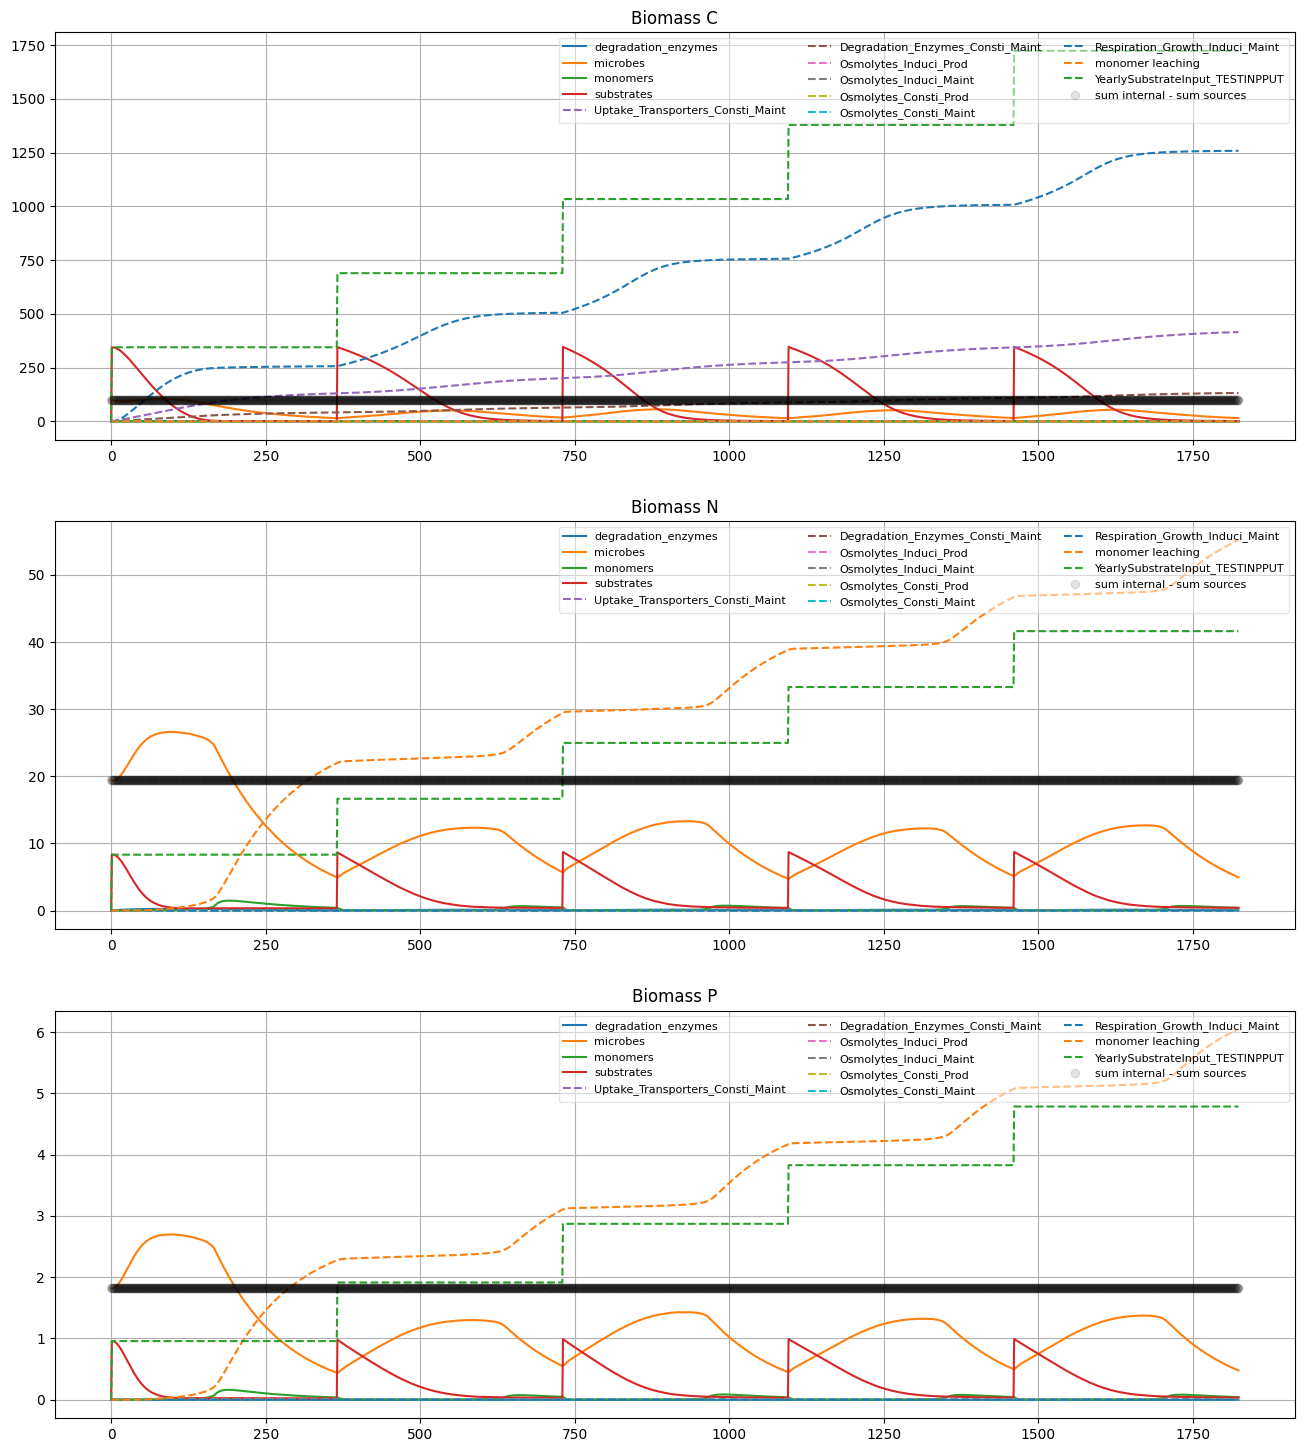

In [45]:
fig, axes = plt.subplots(3,1, figsize=(16,18))
scal = 1.0 / eco.microbes.grid_size
for ia,ax in enumerate(axes):
    pos_sum = []
    neg_sum = []
    tmp_sum = None
    for k, d in tla_comp_space.items():
        if (tmp_sum is None):
            tmp_sum = np.zeros_like(d['values'][:,ia])
            td = d['times']
        ls = get_line_type(k)
        ax.plot(d['times'],scal*d['values'][:,ia],ls, label=k)
        tmp_sum += d['values'][:, ia]
        pos_sum.append(k)
    for k, d in tla_comp_space_external.items():
        if (tmp_sum is None):
            tmp_sum = np.zeros_like(d['values'][:,ia])
            td = d['times']
        ls = get_line_type(k)
        ax.plot(d['times'],scal*d['values'][:,ia],ls, label=k)
        tmp_sum -= d['values'][:, ia]
        neg_sum.append(k)
    ax.plot(td,scal*tmp_sum,'o',color='black',lw=5.0,alpha=0.1,label='sum internal - sum sources')
    ax.grid()
    ax.legend(fontsize=8, ncol=3,loc=1, framealpha=0.5)
    ax.set_title('Biomass {}'.format(['C','N','P'][ia]))

In [46]:
# d_subs_mass = np.gradient(tla_comp_space['substrates']['values'],axis=0)
# print(d_subs_mass[:,0])
# d_source_mass = np.gradient(tla_comp_space_external['YearlySubstrateInput_TESTINPPUT']['values'],axis=0)
# print(d_source_mass[:,0])
# print(d_source_mass[:,0]-d_subs_mass[:,0])

Text(0.5, 1.0, 'Respiration Growth Induci Maint')

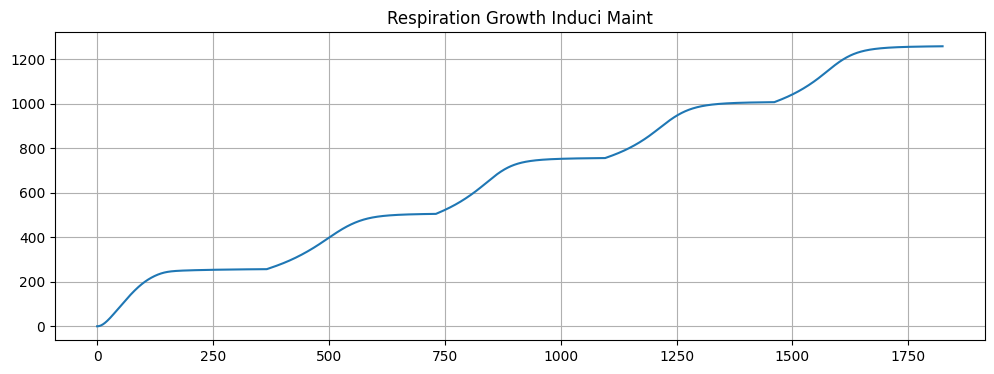

In [47]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
scal = 1.0 / eco.microbes.grid_size
d = tla_comp_space['Respiration_Growth_Induci_Maint']
ax.plot(d['times'],d['values'][:,0]*scal)
ax.grid()
ax.set_title('Respiration Growth Induci Maint')

In [48]:
tla_comp_space.keys()

dict_keys(['degradation_enzymes', 'microbes', 'monomers', 'substrates', 'Uptake_Transporters_Consti_Maint', 'Degradation_Enzymes_Consti_Maint', 'Osmolytes_Induci_Prod', 'Osmolytes_Induci_Maint', 'Osmolytes_Consti_Prod', 'Osmolytes_Consti_Maint', 'Respiration_Growth_Induci_Maint', 'monomer leaching'])

Uptake_Transporters_Consti_Maint
Degradation_Enzymes_Consti_Maint
Osmolytes_Induci_Maint
Osmolytes_Consti_Maint
Respiration_Growth_Induci_Maint


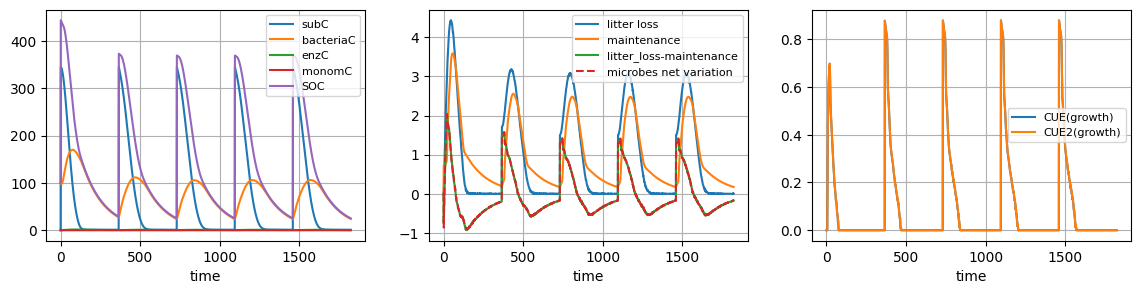

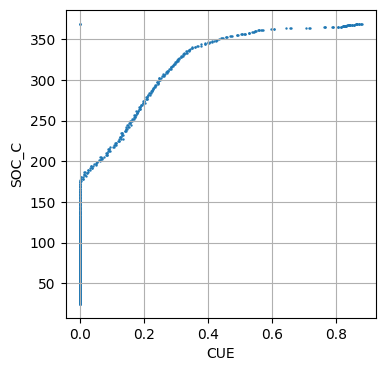

In [8]:
def first_order_grad(d):
    res = np.zeros_like(d)
    res[1:] = d[1:]-d[:-1]
    return res

gradfunc= {
            'np':np.gradient,
            'fo': first_order_grad,
         }['fo']

scal = 1.0 / eco.microbes.grid_size
time = tla_comp_space['substrates']['times']


sum_maint_C = None
sum_prod_C = None
istart = 0
for k,d in tla_comp_space.items():
    if (k.split('_')[-1] == 'Maint'):
        print(k)
        dat = d['values'][:,0]*scal
        #ax.plot(d['times'][istart:],dat[istart:], label=k)
        if (sum_maint_C is None):
            sum_maint_C = np.zeros_like(dat)
            td = d['times']
        sum_maint_C += dat
    if (k.split('_')[-1] == 'Prod'):
        dat = d['values'][:,0]*scal
        #ax.plot(d['times'][istart:],dat[istart:], label=k)
        if (sum_prod_C is None):
            sum_prod_C = np.zeros_like(dat)
            td = d['times']
        sum_prod_C += dat
dsum_maint_C = gradfunc(sum_maint_C)
dsum_prod_C = gradfunc(sum_prod_C)
raw_plot_data =  {
    'subC':scal*tla_comp_space['substrates']['values'][:,0],
    'inputC': scal*tla_comp_space_external['YearlySubstrateInput_TESTINPPUT']['values'][:,0],
    'bacteriaC': scal*tla_comp_space['microbes']['values'][:,0],
    'respC': scal*tla_comp_space['Respiration_Growth_Induci_Maint']['values'][:,0],
    'enzC': scal * tla_comp_space['degradation_enzymes']['values'][:,0],
    'monomC' : scal * tla_comp_space['monomers']['values'][:,0],
    'MaintC': sum_maint_C,
    'ProdC':sum_prod_C,
}

raw_plot_data['SOC'] = raw_plot_data['subC'] + raw_plot_data['enzC'] + raw_plot_data['monomC'] + raw_plot_data['bacteriaC']

convolv = False
if (convolv):
    nconv = 10
    plot_data = {k:scipy.ndimage.uniform_filter1d(d,size=nconv) for k,d in raw_plot_data.items()}
else:
    plot_data = {k:d for k,d in raw_plot_data.items()}
dplot_data = {k:gradfunc(d) for k, d in plot_data.items()}

subC = plot_data['subC']
dsubC = dplot_data['subC']
litter_loss_C = np.zeros_like(dsubC)
litter_gain_C = np.zeros_like(dsubC)
litter_loss_C[dsubC <= 0] = -dsubC[dsubC <= 0]
litter_gain_C[dsubC > 0] = dsubC[dsubC > 0]

# CUE estimation when bacteria mass grows
# estimation from bacterial mass variation dBac / litter_loss ( which amounts to dbiomass / uptake)
cue = np.divide(dplot_data['bacteriaC'] , litter_loss_C, where= litter_loss_C > 1.0e-3)
# filter for bacterial mass growths
filt = np.logical_or(dplot_data['bacteriaC']  < 0.0, litter_loss_C < 1.0e-3)
cue[filt] = 0.0
# estimation from (litter_loss - maintenance)/litter_loss
cue2 = np.divide(litter_loss_C-dplot_data['MaintC'],litter_loss_C,where = litter_loss_C > 1.0e-3)
cue2[filt] = 0.0



%matplotlib inline
fig,axes = plt.subplots(1,3,figsize=(14,3),sharex=True)

for k,d in plot_data.items():
    if (k in ['inputC','MaintC','respC','ProdC']):
        continue
    axes[0].plot(time,d,label=k)

axes[1].plot(time,litter_loss_C,label='litter loss')
axes[1].plot(time,dplot_data['MaintC'],label='maintenance')
axes[1].plot(time,litter_loss_C-dplot_data['MaintC'],label='litter_loss-maintenance')
axes[1].plot(time,dplot_data['bacteriaC'],'--',label='microbes net variation')

axes[2].plot(time,cue,label='CUE(growth)')
axes[2].plot(time,cue2,label='CUE2(growth)')
for ax in axes.ravel():
    ax.grid()
    ax.legend(fontsize=8)
    ax.set_xlabel('time')
plt.show()
plt.close(fig)


SOC_C = plot_data['subC'] + plot_data['enzC'] + plot_data['bacteriaC'] + plot_data['monomC'] 
istart = 2*365+1
fig,ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(cue[istart:],SOC_C[istart:],s=0.5)
#ax.scatter(cue,SOC_C,s=0.5)
ax.set_xlabel('CUE')
ax.set_ylabel('SOC_C')
ax.grid()
plt.show()
plt.close(fig)

# fig,ax = plt.subplots(1,1,figsize=(4,4))
# ax.plot(time,dplot_data['subC'],label='dsubC')
# ax.grid()
# plt.show()
# plt.close(fig)


Uptake_Transporters_Consti_Maint
Degradation_Enzymes_Consti_Maint
Osmolytes_Induci_Maint
Osmolytes_Consti_Maint
Respiration_Growth_Induci_Maint
degradation_enzymes
microbes
monomers
substrates
monomer leaching


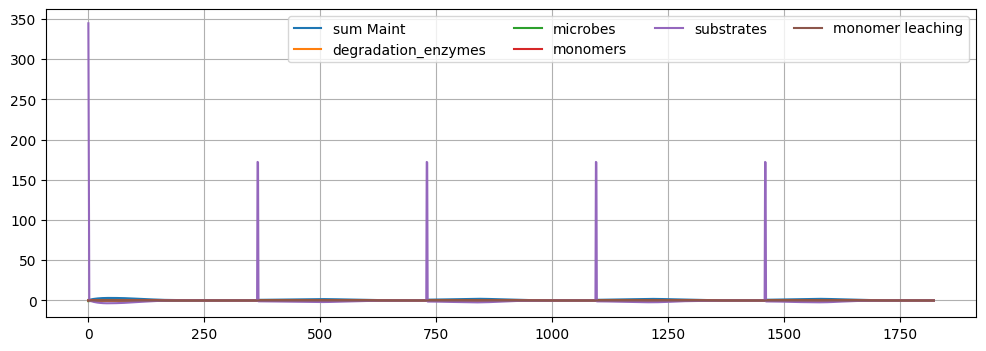

In [50]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
scal = 1.0 / eco.microbes.grid_size
sum_resp = None
istart = 0
for k,d in tla_comp_space.items():
    if (k.split('_')[-1] == 'Maint'):
        print(k)
        dat = np.gradient(d['values'][:,0]*scal)
        #ax.plot(d['times'][istart:],dat[istart:], label=k)
        if (sum_resp is None):
            sum_resp = np.zeros_like(dat)
            td = d['times']
        sum_resp += dat
ax.plot(td[istart:],sum_resp[istart:],label='sum Maint')

sum_state = None
for k,d in tla_comp_space.items():
    if (k.split('_')[-1] != 'Maint') and (k.split('_')[0] != 'Osmolytes'):
        print(k)
        dat = np.gradient(d['values'][:,0]*scal)
        ax.plot(d['times'][istart:],dat[istart:], label=k)
        if (sum_state is None):
            sum_state = np.zeros_like(dat)
            td = d['times']
        sum_state += dat
# for k, d in tla_comp_space_external.items():
#     dat = np.gradient(d['values'][:,0]*scal)
#     ax.plot(d['times'],scal*d['values'][:,0],ls, label=k)

ax.grid()
ax.legend(ncol=4)

In [15]:
tla_enz_p = diagcollector.get_timeline_arrays('space_sum',tag_filter_func=lambda t:'Degradation_Enzymes' in t)

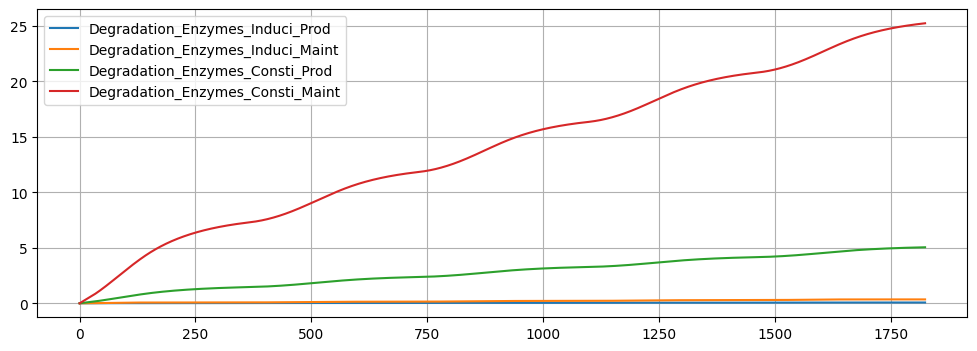

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
scal = 1.0 / eco.microbes.grid_size
for k,d in tla_enz_p.items():
    ax.plot(d['times'],d['values'][:,0,0]*scal,label=k)
ax.grid()
ax.legend()

In [17]:
tla_osmo_p = diagcollector.get_timeline_arrays('space_sum',tag_filter_func=lambda t:'Osmolytes' in t)

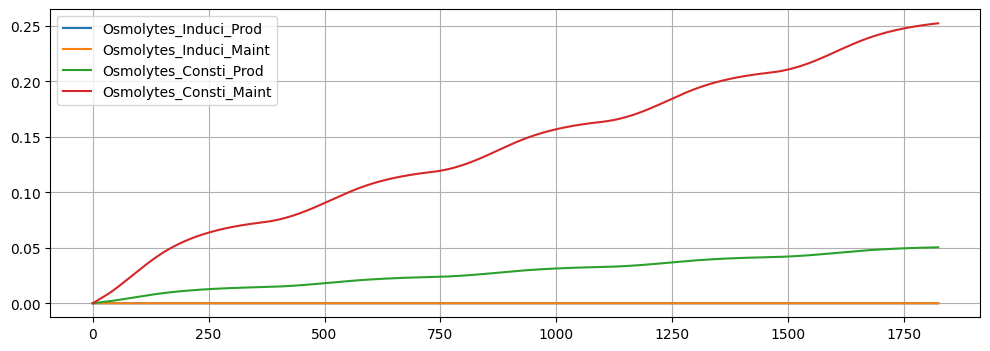

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
scal = 1.0 / eco.microbes.grid_size
for k,d in tla_osmo_p.items():
    ax.plot(d['times'],d['values'][:,0,0]*scal,label=k)
ax.grid()
ax.legend()

In [19]:
tla_upt_p = diagcollector.get_timeline_arrays('space_sum',tag_filter_func=lambda t:'Uptake_Transporters' in t)

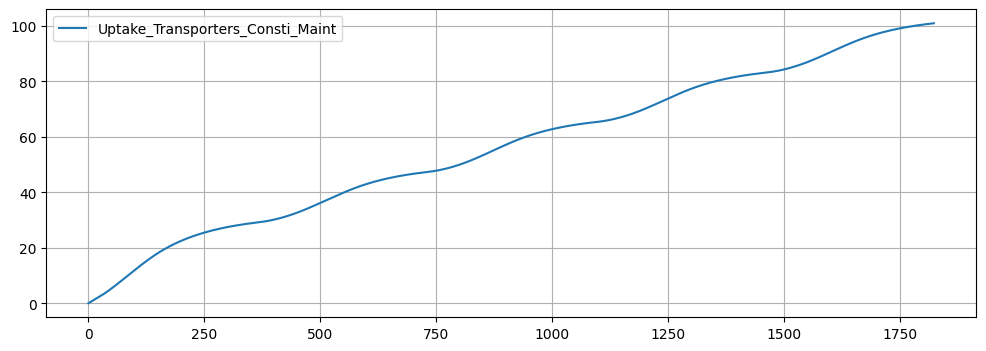

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
scal = 1.0 / eco.microbes.grid_size
for k,d in tla_upt_p.items():
    ax.plot(d['times'],d['values'][:,0,0]*scal,label=k)
ax.grid()
ax.legend()

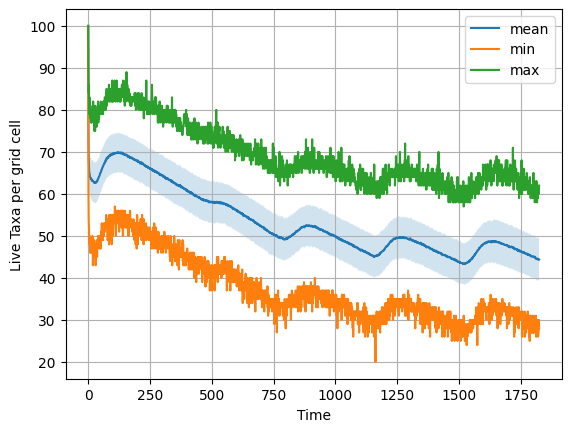

In [21]:
fig, ax = plt.subplots(1,1)
t, dat = tla_mic_ntax['microbes']['times'],tla_mic_ntax['microbes']['values']
ax.plot(t,dat[:,0], label='mean')
ax.fill_between(t,dat[:,0]-dat[:,1],dat[:,0]+dat[:,1], alpha=0.2)
ax.plot(t,dat[:,2], label='min')
ax.plot(t,dat[:,3], label='max')
ax.grid()
ax.set_xlabel('Time')
ax.set_ylabel('Live Taxa per grid cell')
ax.legend();
plt.show()
plt.close(fig)
#

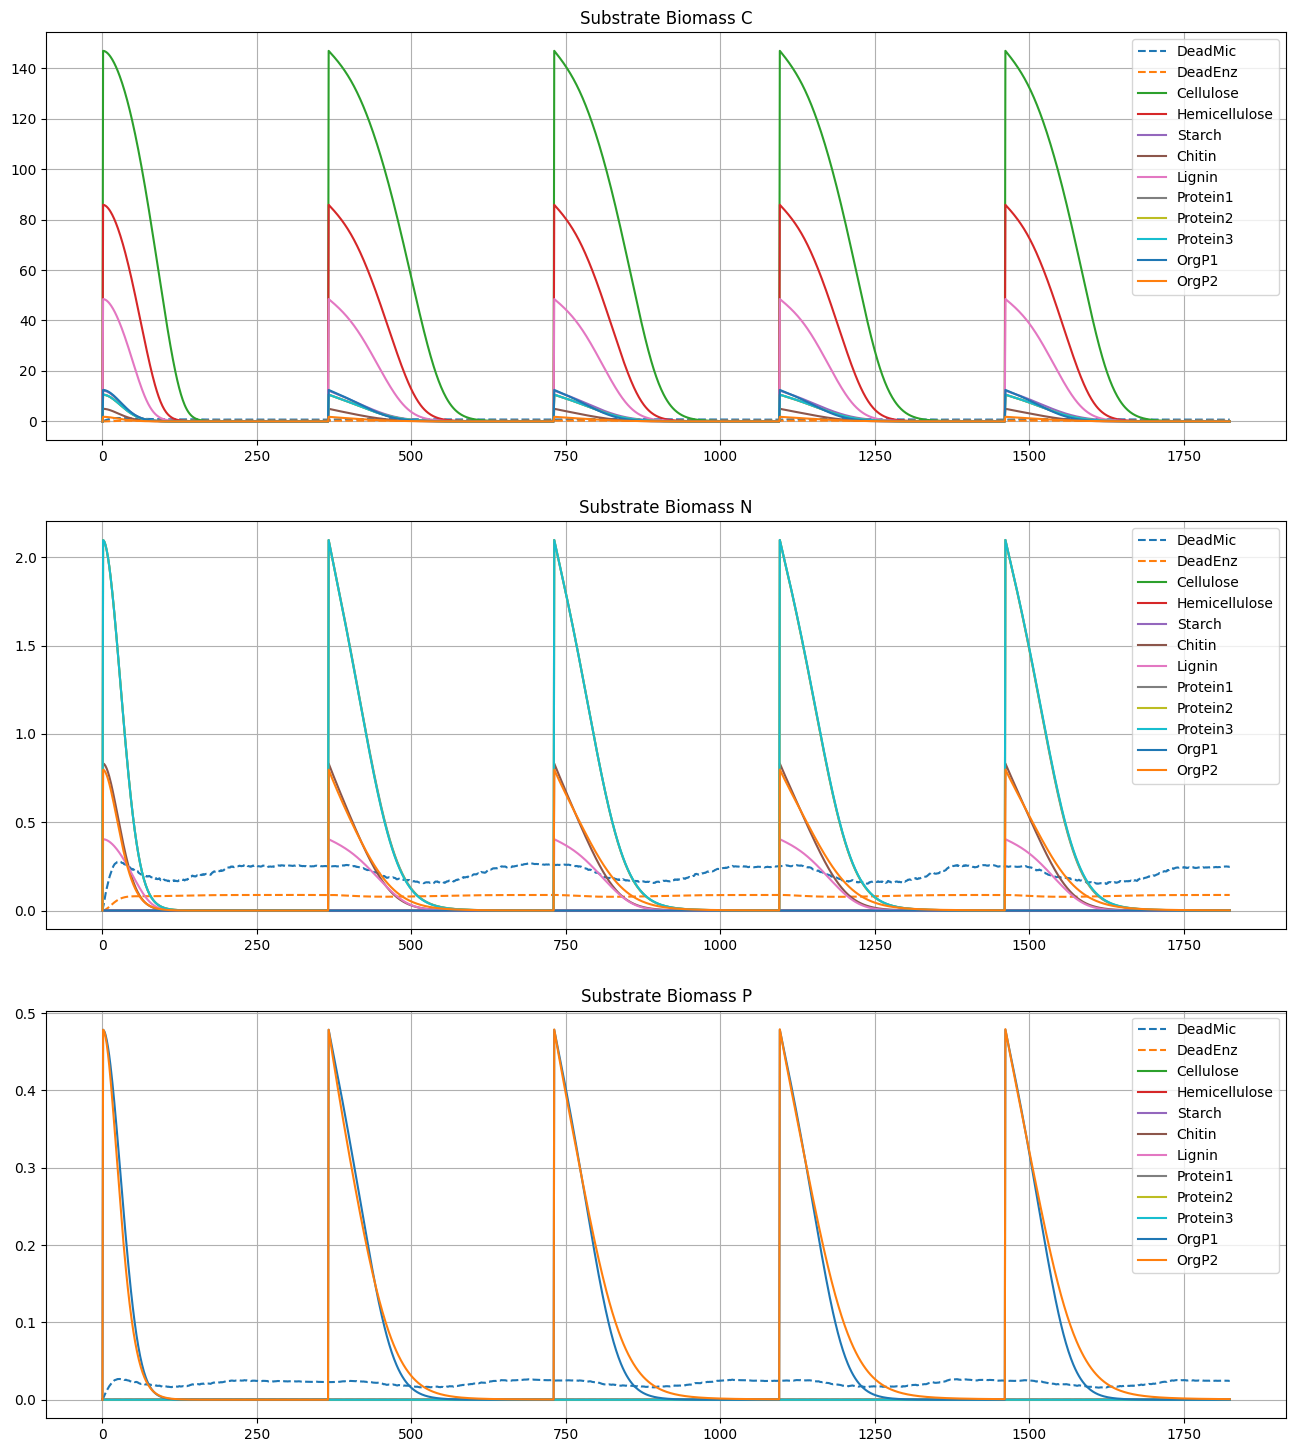

In [22]:
fig, axes = plt.subplots(3,1, figsize=(16,18))
scal = 1.0 / eco.microbes.grid_size
for ia,ax in enumerate(axes):
    for k,d in tla_sub.items():
        for isub, subname in enumerate(eco.substrates.names):
            if (isub < 2):
                ls = '--'
            else:
                ls = '-'
            ax.plot(d['times'],scal*d['values'][:,isub,ia],ls,label=subname)
    ax.legend()
    ax.grid()
    ax.set_title('Substrate Biomass {}'.format(['C','N','P'][ia]))

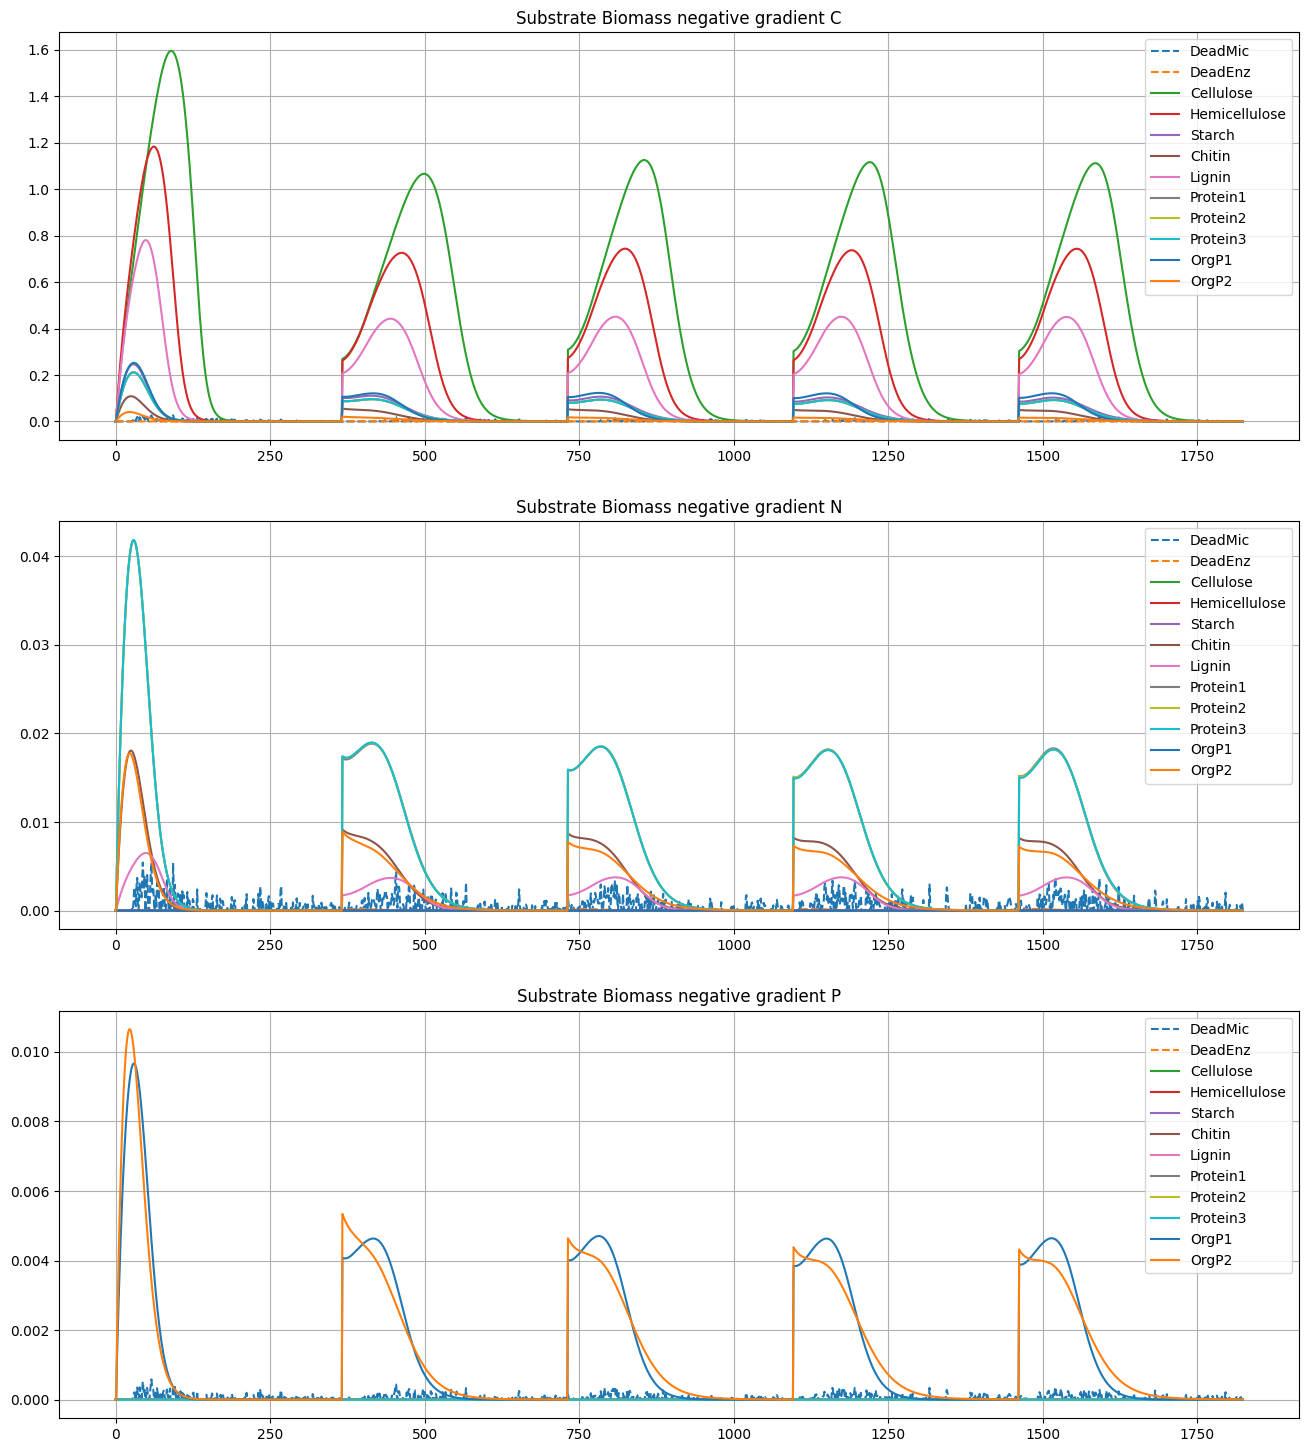

In [23]:
fig, axes = plt.subplots(3,1, figsize=(16,18))
scal = 1.0 / eco.microbes.grid_size
for ia,ax in enumerate(axes):
    for k,d in tla_sub.items():
        for isub, subname in enumerate(eco.substrates.names):
            if (isub < 2):
                ls = '--'
            else:
                ls = '-'
            tmp_s = scal*d['values'][:,isub,ia]
            tmp_g = np.gradient(tmp_s)
            tmp_g[tmp_g > 0] = 0
            ax.plot(d['times'],-tmp_g,ls,label=subname)
    ax.legend()
    ax.grid()
    ax.set_title('Substrate Biomass negative gradient {}'.format(['C','N','P'][ia]))

Text(0.5, 1.0, 'Substrate Biomass negative gradient (C+N+P)')

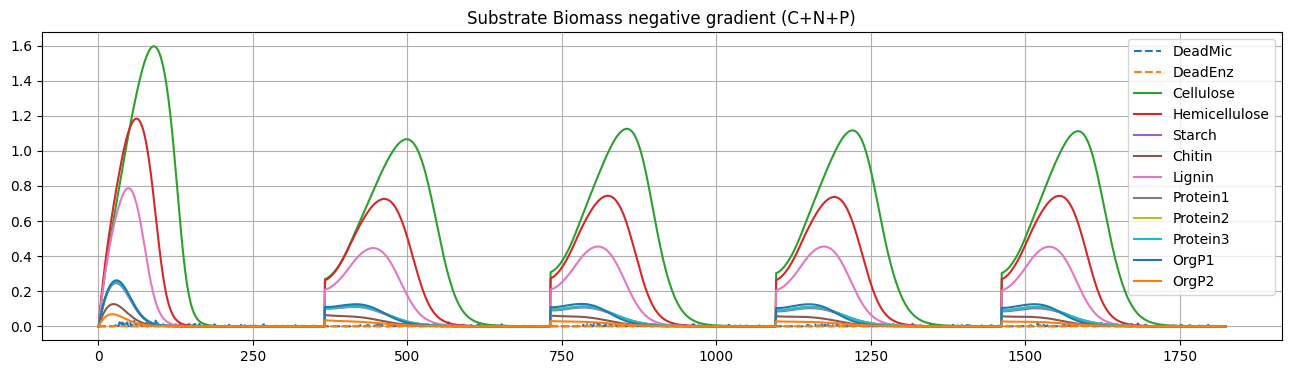

In [24]:
fig, ax = plt.subplots(1,1, figsize=(16,4))
scal = 1.0 / eco.microbes.grid_size
for k,d in tla_sub.items():
    for isub, subname in enumerate(eco.substrates.names):
        if (isub < 2):
            ls = '--'
        else:
            ls = '-'
        tmp_s = scal*np.sum(d['values'][:,isub,:],axis=-1)
        tmp_g = np.gradient(tmp_s)
        tmp_g[tmp_g > 0] = 0
        ax.plot(d['times'],-tmp_g,ls,label=subname)
ax.legend()
ax.grid()
ax.set_title('Substrate Biomass negative gradient (C+N+P)')

/var/folders/11/xm4_hc_91y52yf7jwn_svxcm0000gp/T/ipykernel_8812/2145636971.py:6: RuntimeWarning: invalid value encountered in divide
  dat = dat / loctot[:,np.newaxis]


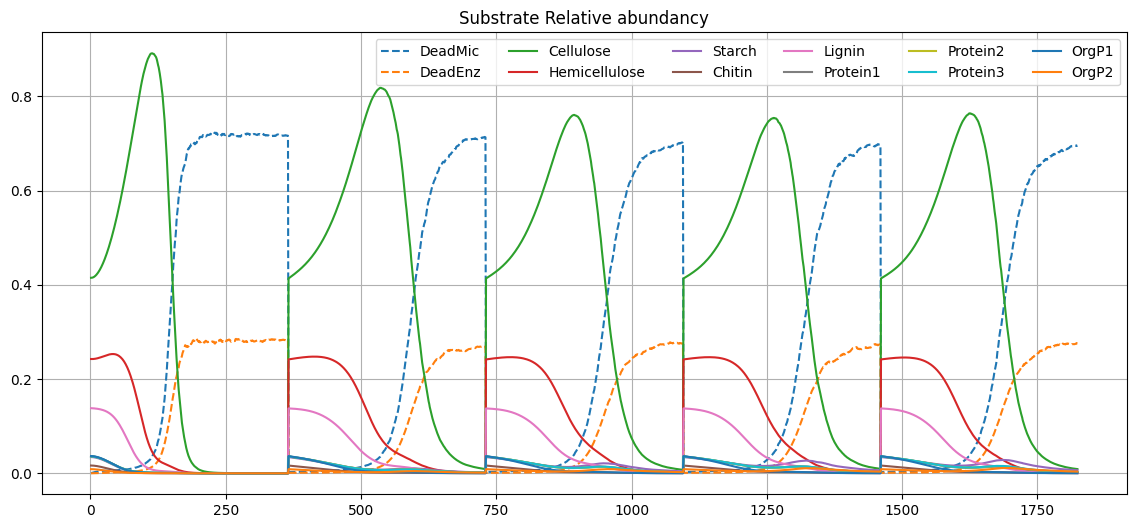

In [25]:
fig, ax = plt.subplots(1,1, figsize=(14,6))
scal = 1.0 / eco.microbes.grid_size
for k,d in tla_sub.items():
    dat = np.sum(d['values'], axis=-1)
    loctot = np.sum(dat, axis=-1)
    dat = dat / loctot[:,np.newaxis]
#     dat = np.divide(dat , loctot[:,np.newaxis], where = loctot[:,np.newaxis] > 0)
    for isub, subname in enumerate(eco.substrates.names):
        if (isub < 2):
            ls = '--'
        else:
            ls = '-'
        ax.plot(d['times'],dat[:,isub],ls,label=subname)
ax.legend(loc=1 ,ncol=6, )
ax.grid()
ax.set_title('Substrate Relative abundancy');


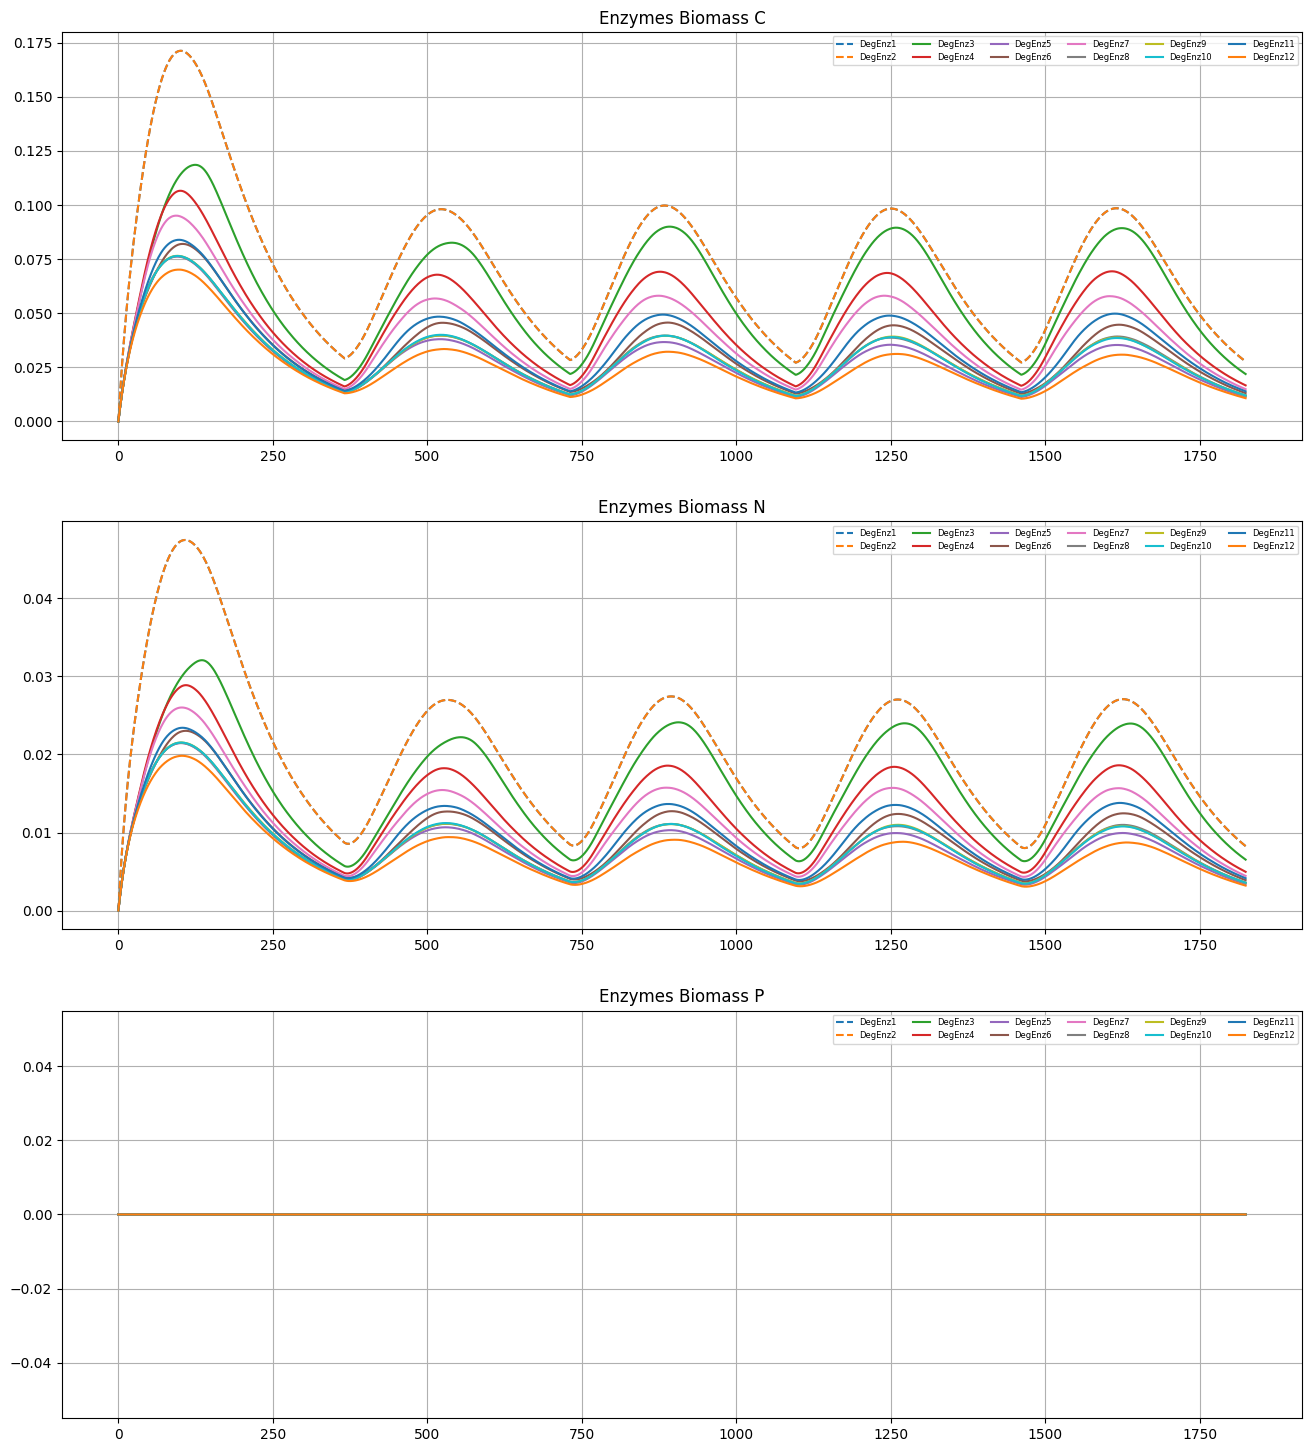

In [26]:
fig, axes = plt.subplots(3,1, figsize=(16,18))
scal = 1.0 / eco.microbes.grid_size
for ia,ax in enumerate(axes):
    for k,d in tla_enz.items():
        for ienz, enzname in enumerate(eco.degradation_enzymes.names):
            if (ienz < 2):
                ls = '--'
            else:
                ls = '-'
            ax.plot(d['times'],scal*d['values'][:,ienz,ia],ls,label=enzname)
    ax.legend(ncol=6, fontsize=6)
    ax.grid()
    ax.set_title('Enzymes Biomass {}'.format(['C','N','P'][ia]))

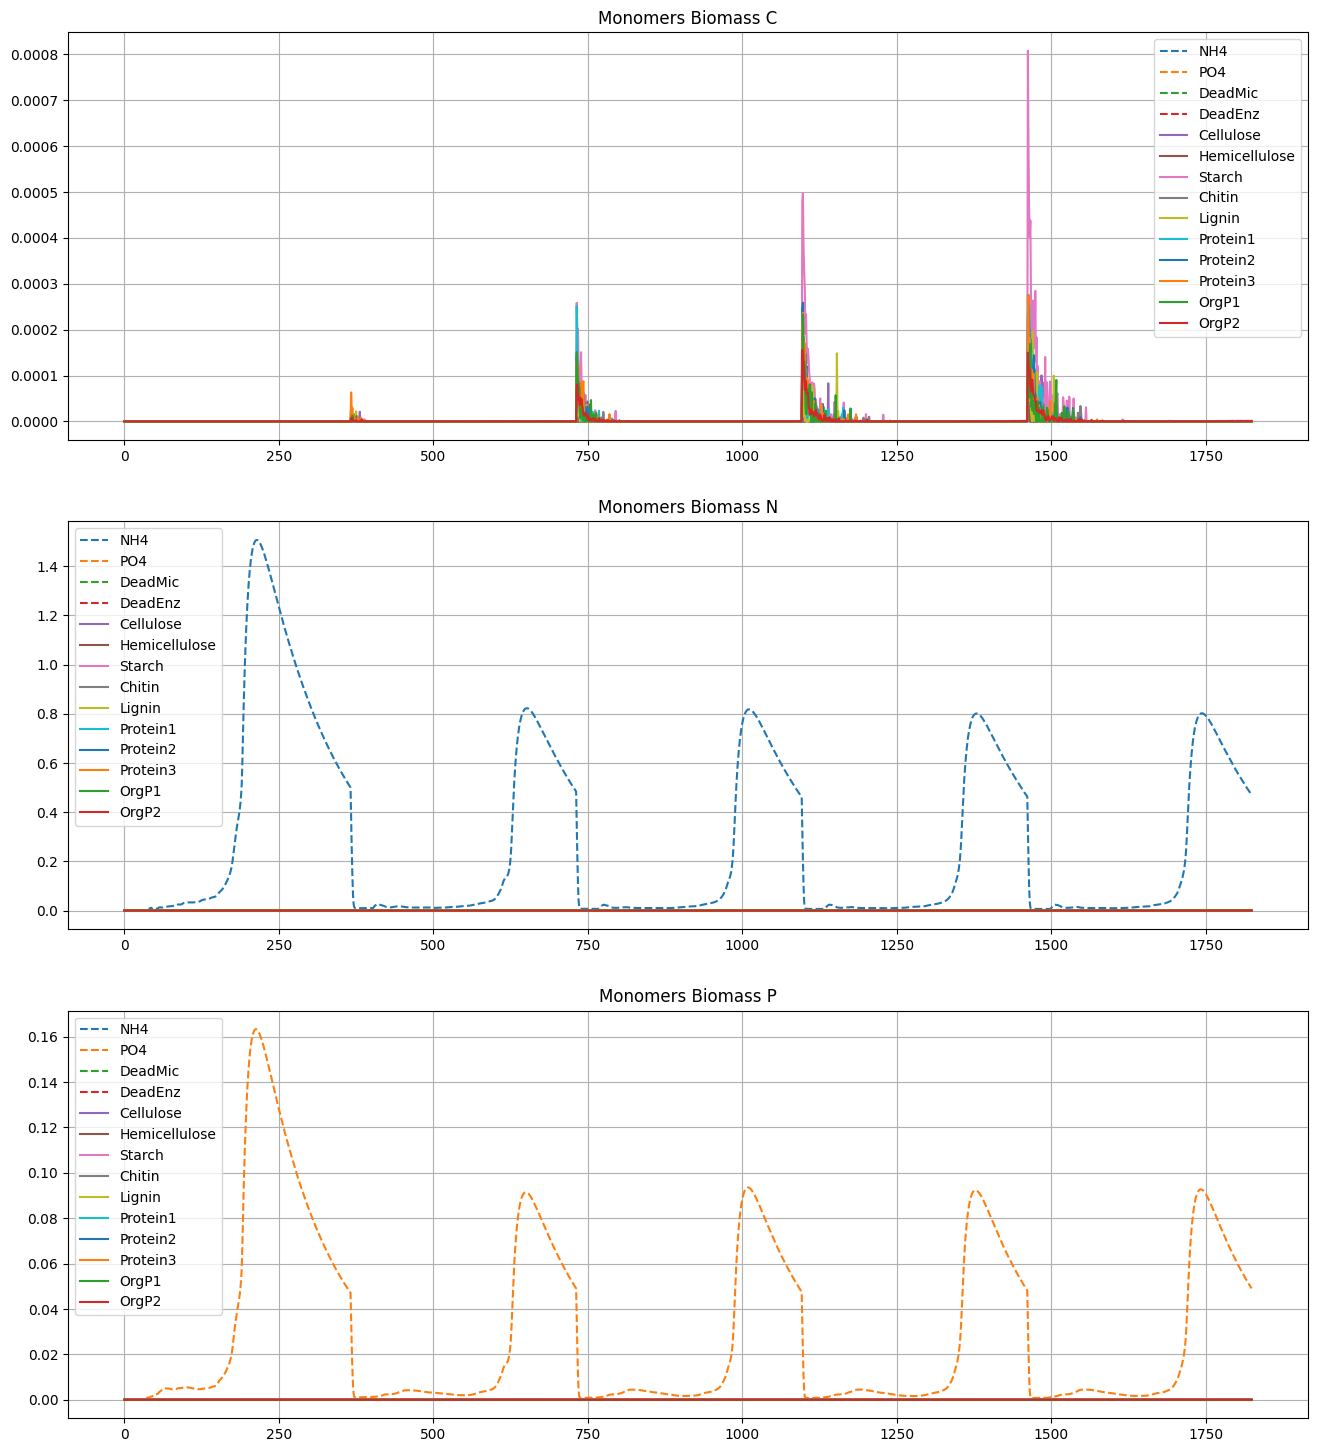

In [27]:
fig, axes = plt.subplots(3,1, figsize=(16,18))
scal = 1.0 / eco.microbes.grid_size
for ia,ax in enumerate(axes):
    for k,d in tla_mon.items():
        for imon, monname in enumerate(eco.monomers.names):
            if (imon < 4):
                ls = '--'
            else:
                ls = '-'
            ax.plot(d['times'],scal*d['values'][:,imon,ia],ls,label=monname)
    ax.legend()
    ax.grid()
    ax.set_title('Monomers Biomass {}'.format(['C','N','P'][ia]))

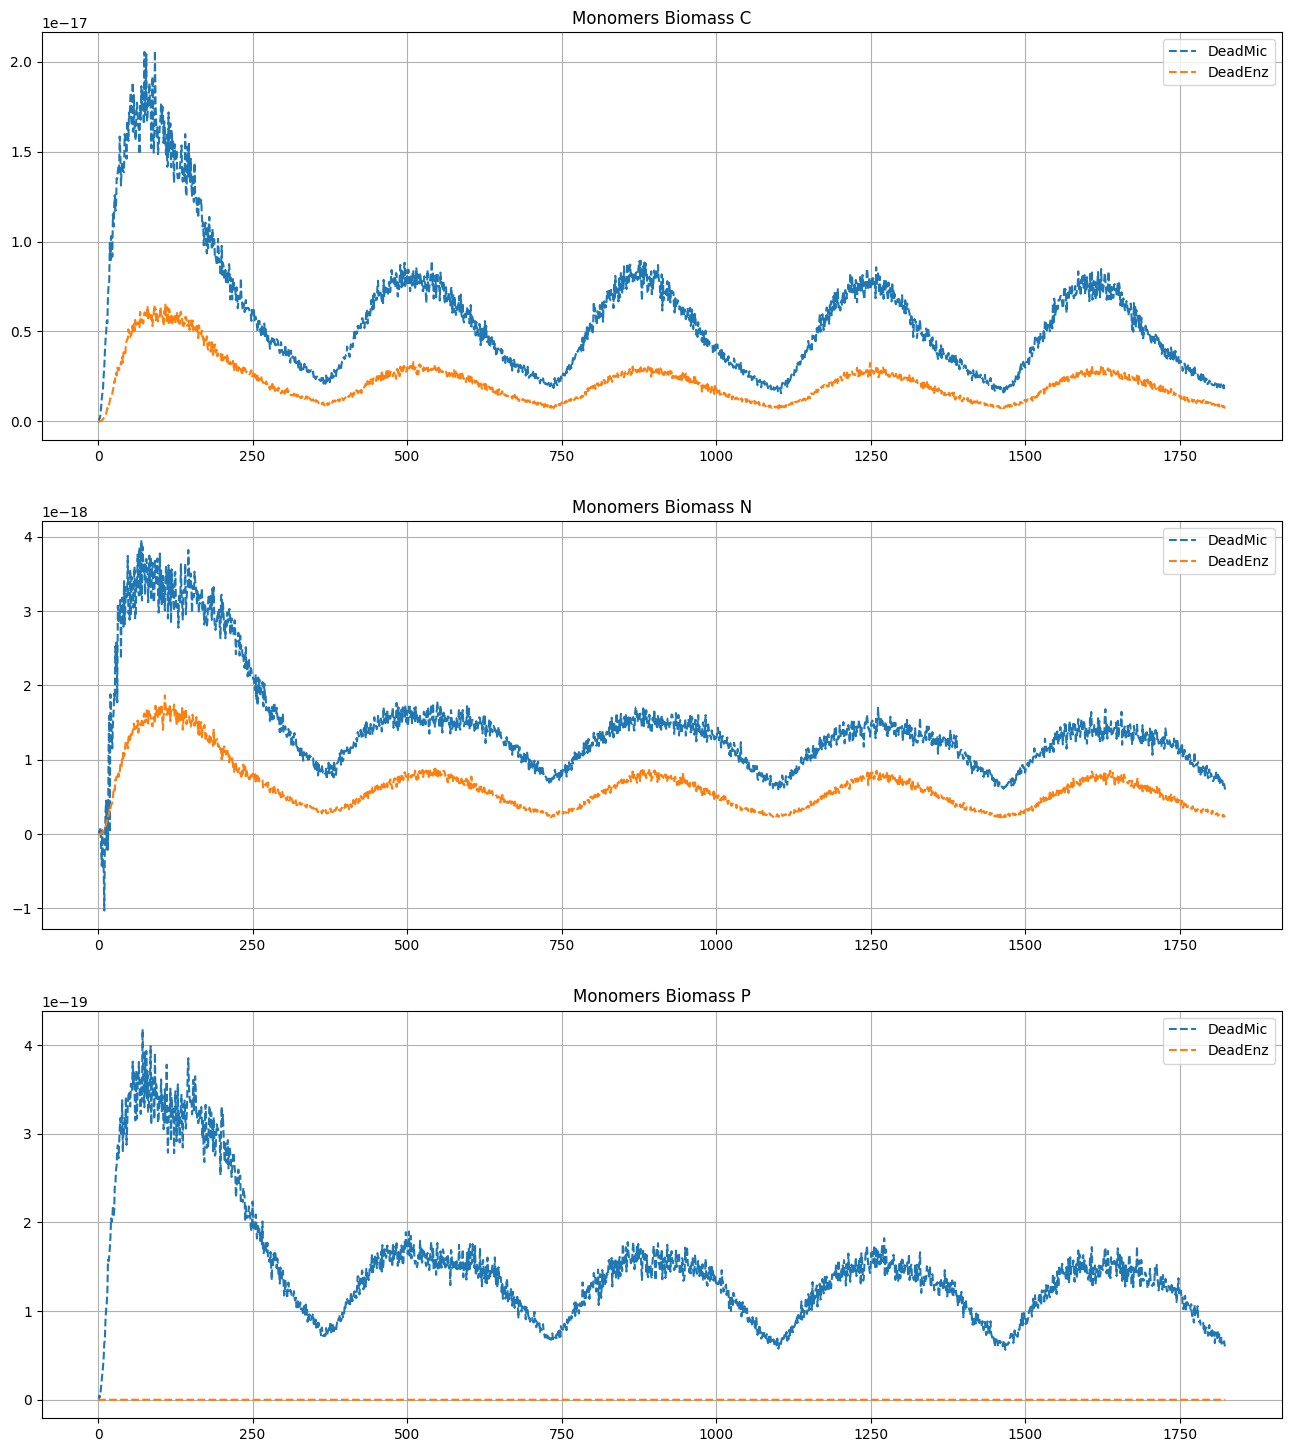

In [28]:
fig, axes = plt.subplots(3,1, figsize=(16,18))
scal = 1.0 / eco.microbes.grid_size
for ia,ax in enumerate(axes):
    for k,d in tla_mon.items():
        for imon, monname in enumerate(eco.monomers.names):
            if (monname not in (['DeadMic','DeadEnz'])):
                continue
            if (imon < 4):
                ls = '--'
            else:
                ls = '-'
            ax.plot(d['times'],scal*d['values'][:,imon,ia],ls,label=monname)
    ax.legend()
    ax.grid()
    ax.set_title('Monomers Biomass {}'.format(['C','N','P'][ia]))

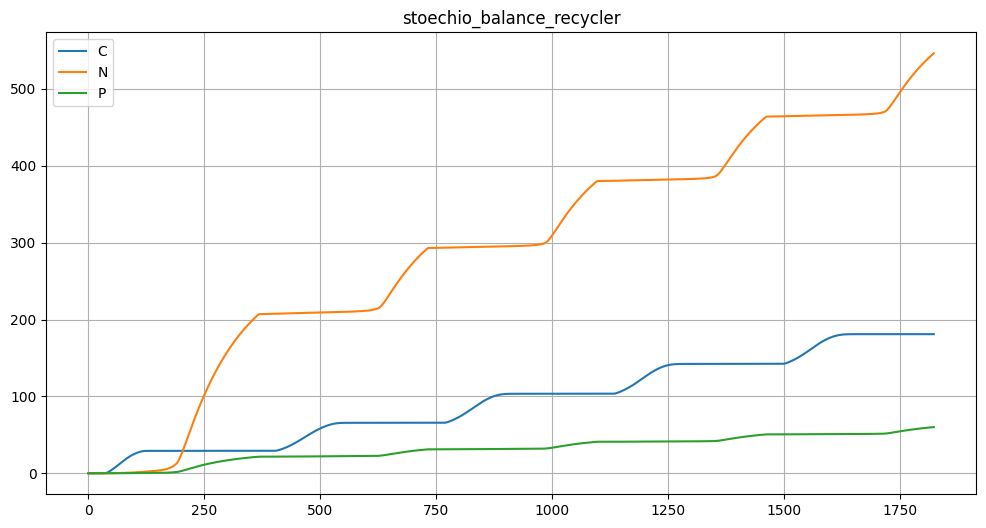

In [29]:
scal = 1.0 / eco.microbes.grid_size
for k,d in tla_recycling.items():
    fig, ax = plt.subplots(1,1, figsize=(12,6))
    for ia in range(3):
        ax.plot(d['times'],scal*d['values'][:,ia], label=['C','N','P'][ia])
    ax.legend()
    ax.set_title(k)
    ax.grid()

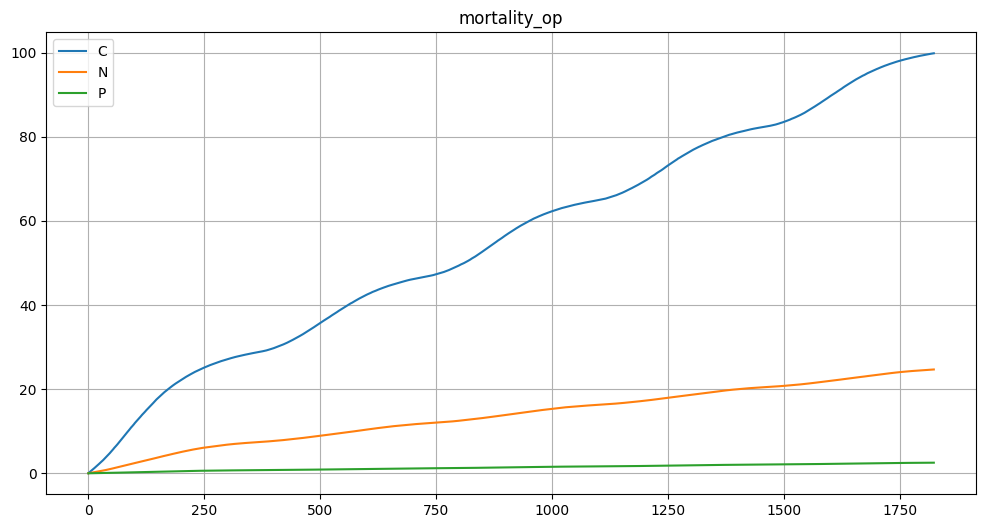

In [30]:
scal = 1.0 / eco.microbes.grid_size
for k,d in tla_mortality.items():
    fig, ax = plt.subplots(1,1, figsize=(12,6))
    for ia in range(3):
        ax.plot(d['times'],scal*d['values'][:,ia], label=['C','N','P'][ia])
    ax.legend()
    ax.set_title(k)
    ax.grid()

In [ ]:
# scal = 1.0 / eco.microbes.grid_size
# for k, d in tla_bytype.items():
#     mtypes = eco.microbes.get_taxa_types()
#     print(mtypes)
#     fig, axes = plt.subplots(3,1, figsize=(14,12))
#     for ia, ax in enumerate(axes):
#         ax.set_title('{} {}'.format(k, ['C','N','P'][ia]))
#         for itype, typ in enumerate(mtypes):
#             ax.plot(d['times'],scal*d['values'][:,itype,ia],label=typ)
#         ax.grid()
#         ax.legend(fontsize=9)

In [ ]:
# %matplotlib inline
# scal = 1.0 / eco.microbes.grid_size
# fig = plt.figure(figsize=(16,8))
# # plt.pcolormesh(tla_ncells['microbes']['values'].T *scal, shading='flat', cmap='magma')
# plt.imshow(tla_ncells['microbes']['values'].T*scal,aspect='auto',origin='lower',interpolation="None", cmap='magma')
# plt.xlabel('time')
# plt.ylabel('taxon id')
# plt.title('Taxon grid occupation fraction ')
# plt.colorbar();

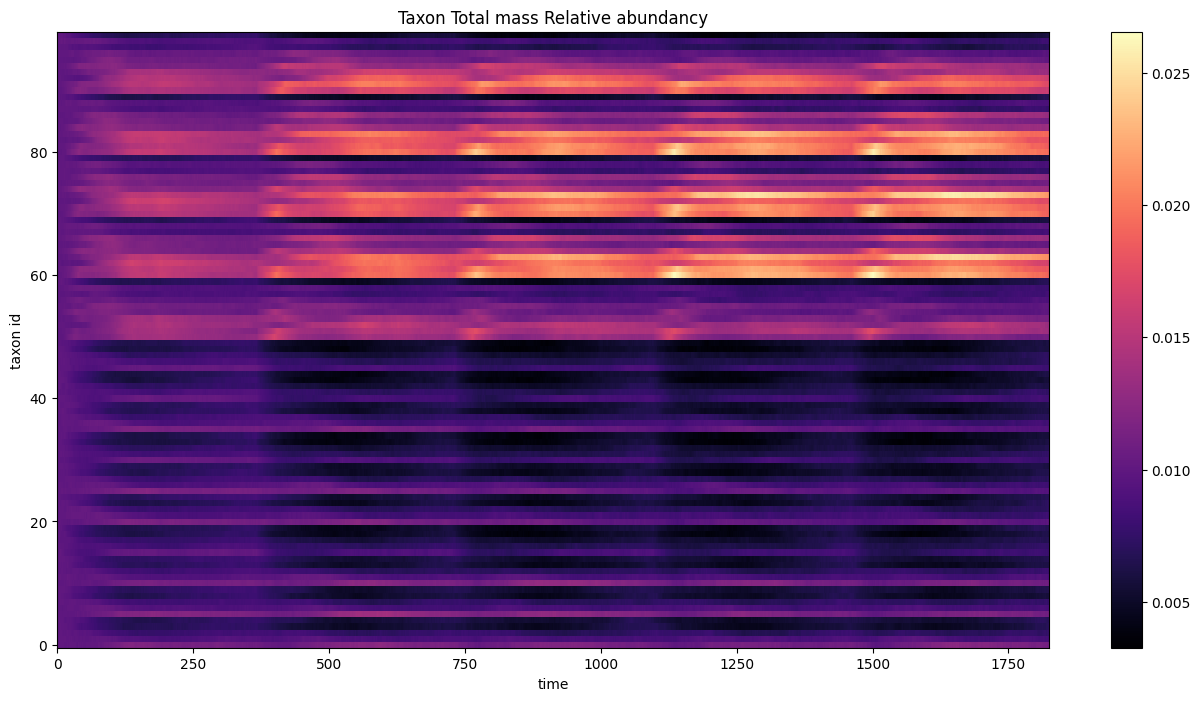

In [31]:
%matplotlib inline
scal = 1.0 / eco.microbes.grid_size
fig = plt.figure(figsize=(16,8))
dat = np.sum(tla_mic['microbes']['values'][:,:,:],axis=-1)
sdat = np.sum(dat,axis=1)
dat = dat / sdat[:,np.newaxis]
plt.imshow(dat.T, aspect='auto',origin='lower',interpolation='None', cmap='magma')
plt.xlabel('time')
plt.ylabel('taxon id')
plt.title('Taxon Total mass Relative abundancy')
plt.colorbar();

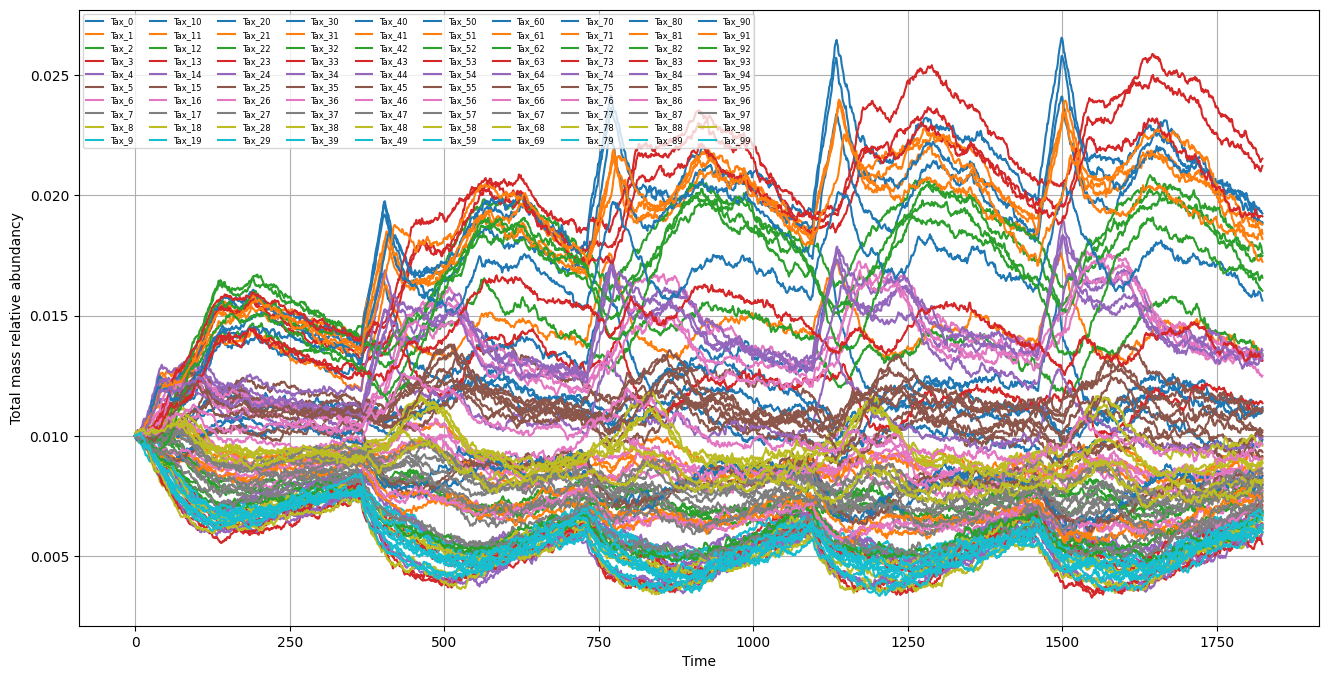

In [32]:
%matplotlib inline
scal = 1.0 / eco.microbes.grid_size
fig = plt.figure(figsize=(16,8))
dat = np.sum(tla_mic['microbes']['values'][:,:,:],axis=-1)
sdat = np.sum(dat,axis=1)
dat = dat / sdat[:,np.newaxis]
plt.plot(tla_mic['microbes']['times'],dat,label=eco.microbes.names)
plt.legend(ncol=10, fontsize=6)
plt.xlabel('Time')
plt.ylabel('Total mass relative abundancy')
plt.grid()
# plt.ylim(0.05,0.15)
# plt.imshow(dat.T, aspect='auto',origin='lower',interpolation='None', cmap='magma')
# plt.xlabel('time')
# plt.ylabel('taxon id')
# plt.title('Taxon Total mass Relative abundancy')
# plt.colorbar();

In [ ]:
# %matplotlib inline
# scal = 1.0 / eco.microbes.grid_size
# fig = plt.figure(figsize=(16,8))
# # plt.imshow(tla_ncells['microbes'][1].T,aspect='auto', origin='lower',interpolation='None')
# dat = np.sum(tla_mic['microbes']['values'][:,:,:],axis=-1)
# sdat = np.sum(dat,axis=1)
# dat = dat / sdat[:,np.newaxis]
# plt.pcolormesh(np.log10(dat.T), shading='flat', cmap='magma')
# plt.imshow(np.log10(dat.T), aspect='auto',origin='lower',interpolation='None', cmap='magma')

# plt.xlabel('time')
# plt.ylabel('taxon id')
# plt.title('Taxon Total mass Relative abundancy (log)')
# plt.colorbar();

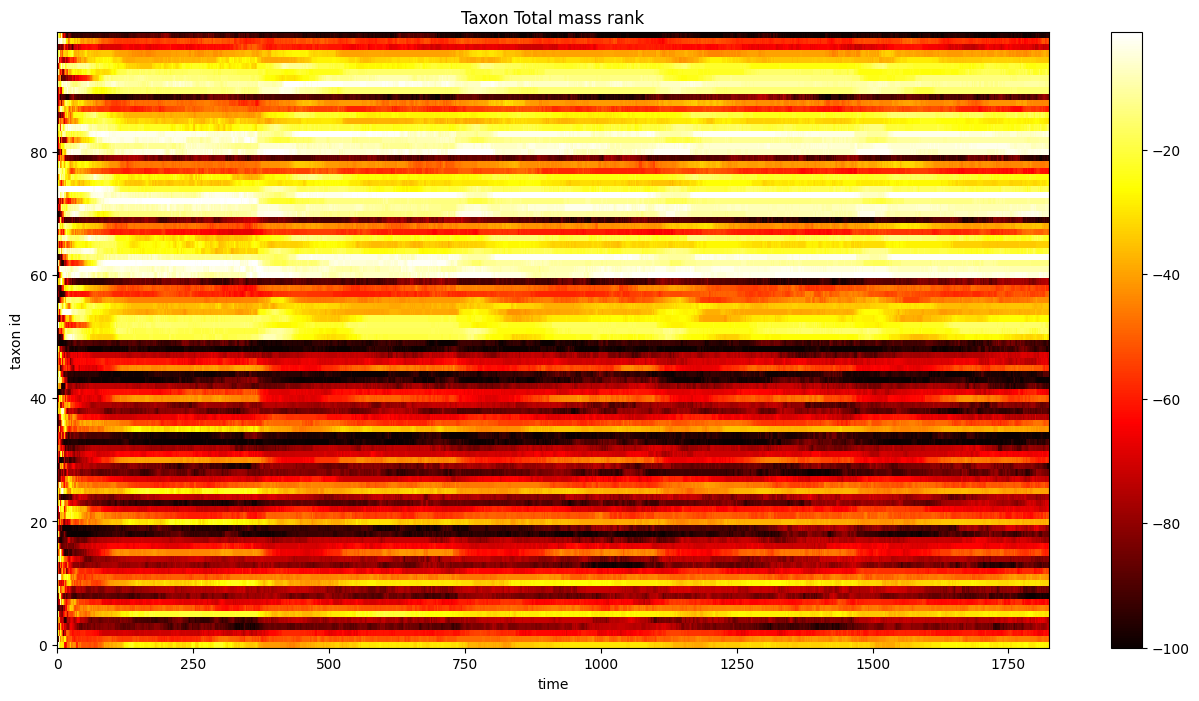

In [33]:
%matplotlib inline
scal = 1.0 / eco.microbes.grid_size
fig = plt.figure(figsize=(16,8))
dat = np.sum(tla_mic['microbes']['values'][:,:,:],axis=-1)
ranks = rankdata(-dat,method='max', axis=1)
plt.imshow(-ranks.T, aspect='auto',origin='lower',interpolation='None', cmap='hot')
plt.xlabel('time')
plt.ylabel('taxon id')
plt.title('Taxon Total mass rank')
plt.colorbar();

In [ ]:
# %matplotlib inline
# scal = 1.0 / eco.microbes.grid_size
# fig = plt.figure(figsize=(16,8))
# dat = np.sum(tla_mic['microbes']['values'][:,:,:],axis=-1)
# ranks = rankdata(-dat,method='max', axis=1)
# plt.step(tla_mic['microbes']['times'],ranks, label=eco.microbes.names);
# # plt.legend()
# plt.imshow(-ranks.T, aspect='auto',origin='lower',interpolation='None', cmap='hot')
# plt.xlabel('time')
# plt.ylabel('taxon id')
# plt.title('Taxon Total mass rank')
# plt.colorbar();

In [ ]:
# %matplotlib inline
# scal = 1.0 / eco.microbes.grid_size
# fig = plt.figure(figsize=(16,8))
# # plt.imshow(tla_ncells['microbes'][1].T,aspect='auto', origin='lower',interpolation='None')
# plt.pcolormesh((tla_ncells['microbes']['values'].T > 0).astype(float), shading='flat', cmap='gray', vmin=0,vmax=1)
# plt.xlabel('time')
# plt.ylabel('taxon id')
# plt.title('Taxon grid survival ')
# plt.colorbar();

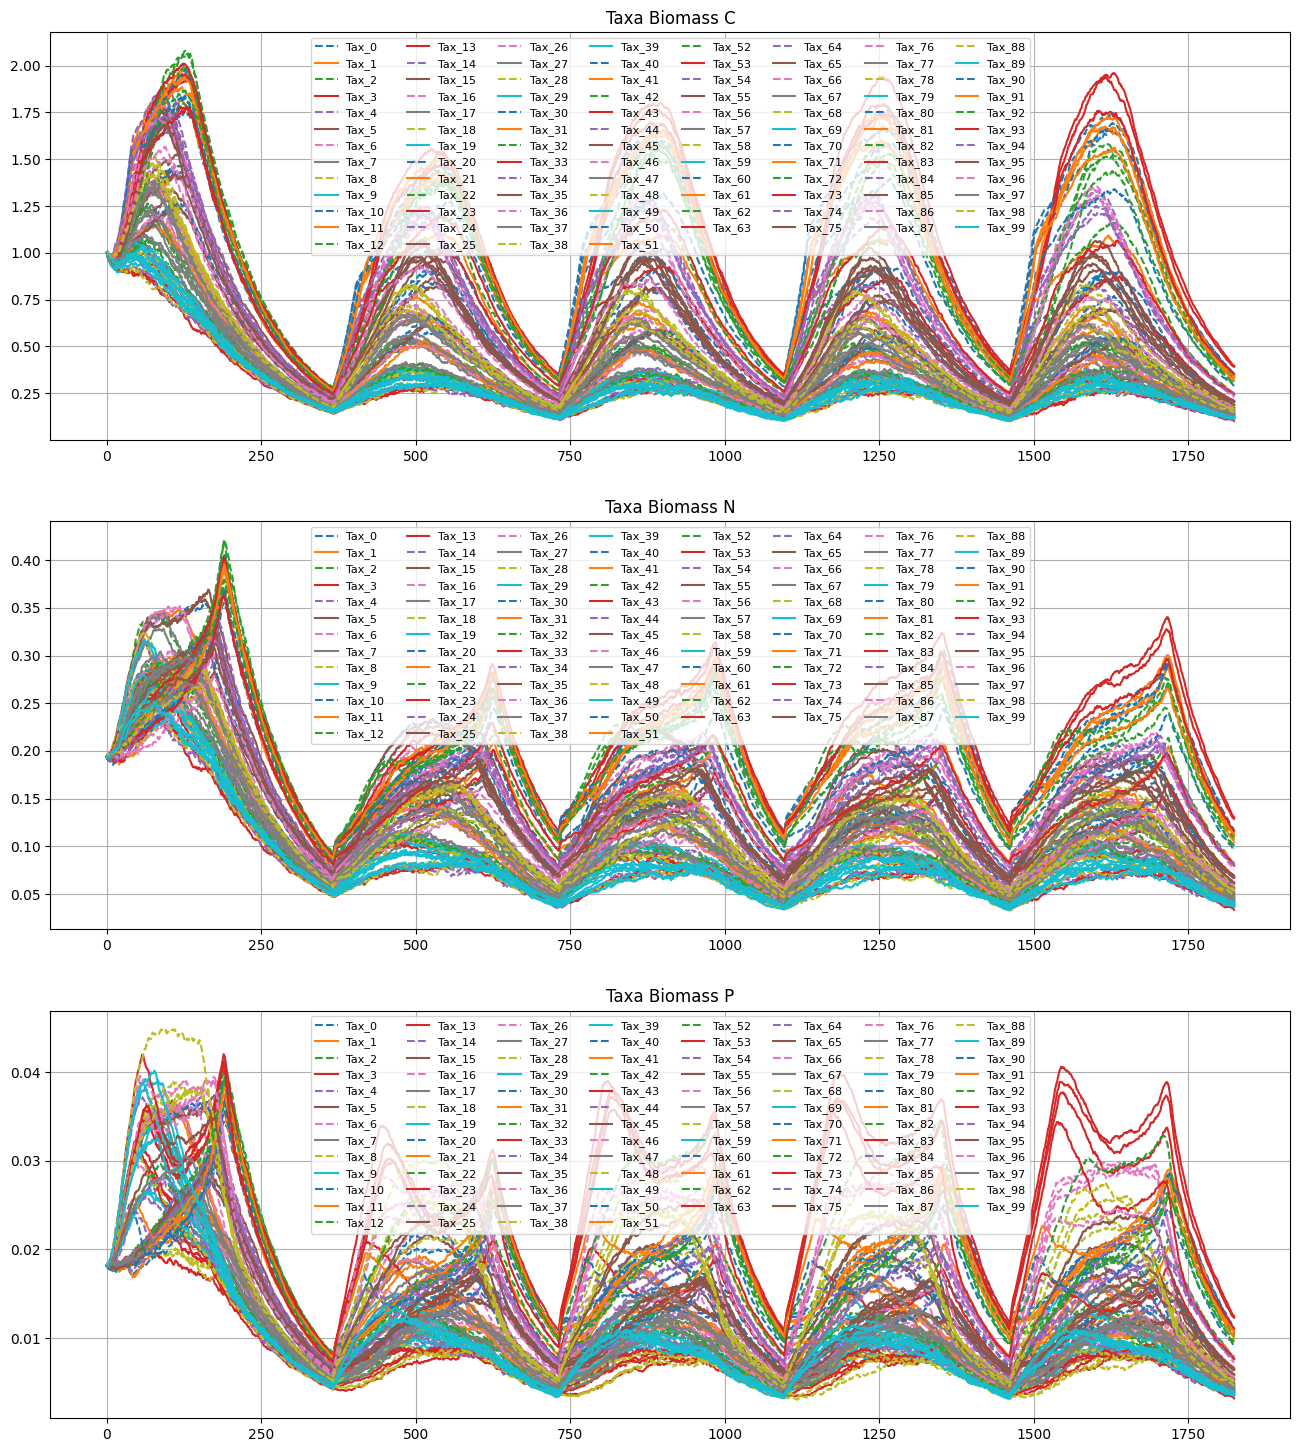

In [34]:
fig, axes = plt.subplots(3,1, figsize=(16,18))
scal = 1.0 / eco.microbes.grid_size
for ia,ax in enumerate(axes):
    for k,d in tla_mic.items():
        for itax, micname in enumerate(eco.microbes.names):
            if (itax%2 ==0):
                ls = '--'
            else:
                ls = '-'
            ax.plot(d['times'],scal*d['values'][:,itax,ia],ls,label=micname)
    ax.legend(ncol=8, fontsize=8)
    ax.grid()
    ax.set_title('Taxa Biomass {}'.format(['C','N','P'][ia]))

In [ ]:
# fig, ax = plt.subplots(1,1, figsize=(16,6))
# scal = 1.0 / eco.microbes.grid_size
# ia = 0
# for k,d in tla_mic.items():
#     for itax, micname in enumerate(eco.microbes.names):
#         if (itax%2 ==0):
#             ls = '--'
#         else:
#             ls = '-'
#         ax.plot(d['times'],np.log(scal*d['values'][:,itax,ia]),ls,label=micname)
# ax.legend(ncol=8, fontsize=6)
# ax.grid()
# ax.set_title('Log Taxa Biomass {}'.format(['C','N','P'][ia]))

In [ ]:
# targ_src_costs_consti, src_costs_consti, targ_ranks_consti = eco.microbes.get_metabolic_processes_operands('Consti',{'temp':20,'psi':0})
# targ_src_costs_induci, src_costs_induci, targ_ranks_induci = eco.microbes.get_metabolic_processes_operands('Induci', 
#                                                                                                           {'temp':20,'psi':0})
# VmaxUpt,KmUpt = eco.uptake_transporters.get_kinetic_parameters({'temp':20,'psi':0})
# taxupt_C_prod = eco.microbes.get_metabolite('Uptake_Transporters').ref_cost['Consti']
# taxupt_C_prod.shape
# taxupt_C_prod

In [ ]:
# induci_fact_C = (1.0-src_costs_induci[0,:,0])*(1.0-src_costs_induci[1,:,0])
# print(induci_fact_C)
# print('*************')
# print(taxupt_C_prod)
# print('*********')
# W_upt = induci_fact_C[:,np.newaxis] * taxupt_C_prod
# print(VmaxUpt.diagonal())
# W_upt = W_upt * VmaxUpt.diagonal()[np.newaxis,:]
# print(W_upt.shape)
# for itax in range(eco.microbes.n_taxa):
#     print('*')
#     print(W_upt[itax,:])

In [ ]:
# tmon = np.sum(tla_mon['monomers']['values'],axis=2)
# print(tmon.shape)
# print(scal)
# drho_M = (scal * tmon[:,:]) / (KmUpt.diagonal()[np.newaxis,:]+scal * tmon[:,:])
# print(drho_M.shape)
# rho_M = np.cumsum(drho_M,axis=0)
# print(rho_M.shape)
# rho_M[1:,:] = rho_M[1:,:] / tla_mon['monomers']['times'][1:,np.newaxis] 

In [ ]:
# fig,ax = plt.subplots(1,1,figsize=(16,5))
# ax.plot(tla_mon['monomers']['times'],drho_M,label=eco.monomers.names)
# ax.grid()
# ax.legend()

In [ ]:
# fig,axes = plt.subplots(14,1,figsize=(16,20))
# print(axes.shape)
# for iax, ax in enumerate(axes):
#     ax.plot(tla_mon['monomers']['times'],drho_M[:,iax],label=eco.monomers.names[iax])
#     ax.grid()
#     ax.legend()



In [ ]:
# fig,ax = plt.subplots(1,1,figsize=(16,5))
# ax.plot(tla_mon['monomers']['times'],rho_M,label=eco.monomers.names)
# ax.grid()
# ax.legend()

In [ ]:
# fig,ax = plt.subplots(1,1,figsize=(16,5))
# ax.plot(tla_mon['monomers']['times'],rho_M,label=eco.monomers.names)
# ax.grid()
# ax.legend()

In [ ]:
# itax = 0
# fig, ax = plt.subplots(1,1, figsize=(16,5))
# print(W_upt[itax,:])
# dm_eff_upt_rate  = W_upt[itax,:][np.newaxis,:] * rho_M 
# print(dm_eff_upt_rate.shape)
# ax.plot(tla_mon['monomers']['times'],dm_eff_upt_rate,label=eco.monomers.names)
# ax.legend(fontsize=8)
# ax.grid()

In [ ]:
# itax = 0
# fig, ax = plt.subplots(1,1, figsize=(16,5))
# dm_eff_upt = dm_eff_upt_rate * tla_mon['monomers']['times'][:,np.newaxis]
# ax.plot(tla_mon['monomers']['times'],dm_eff_upt,label=eco.monomers.names)
# ax.legend(fontsize=8)
# ax.grid()

In [ ]:
# itax = 0
# fig, ax = plt.subplots(1,1, figsize=(16,5))
# ax.plot(tla_mon['monomers']['times'],np.sum(dm_eff_upt,axis=1),label='upt tax = {}'.format(itax))
# ax.legend(fontsize=8)
# ax.grid()

In [ ]:
# fig, ax = plt.subplots(1,1, figsize=(16,6))
# scal = 1.0 / eco.microbes.grid_size
# ia = 0
# itax = 0
# w = W_upt[itax,:]
# dm_eff_upt_rate  = np.sum(w[np.newaxis,:] * rho_M,axis=1)
# print(dm_eff_upt_rate.shape)
# d = tla_mic['microbes']
# ax.plot(d['times'],np.log(scal*d['values'][:,itax,ia]),label=micname)
# consti_loss = np.log(scal*d['values'][0,itax,ia])- src_costs_consti[0,itax,ia] * d['times']
# loc_model = np.log(scal*d['values'][0,itax,ia]) +(dm_eff_upt_rate-src_costs_consti[0,itax,ia]) * d['times']
# ax.plot(d['times'],consti_loss,'--',label='constitutive loss')
# ax.plot(d['times'],loc_model,'+',label='loc_model')
# ax.legend(ncol=8, fontsize=10)
# ax.grid()
# ax.set_title('Log Taxa Biomass {}'.format(['C','N','P'][ia]))

In [ ]:
# fig = plt.figure(figsize=(14,8))
# for itax in range(tla_ncells['microbes']['values'].shape[1]):
#     if (np.max(tla_ncells['microbes']['values'][:,itax]) > 0):
#         plt.plot(tla_ncells['microbes']['times'],tla_ncells['microbes']['values'][:,itax], label='{}'.format(itax))
# plt.legend(fontsize=6, ncol=6)
# plt.title('Taxa ncell > 50')
# plt.xlabel('Time')
# plt.ylabel('Number of occupied cells')
# plt.grid()


In [ ]:
# for itax in range(eco.microbes.n_taxa):
#     fig, ax = plt.subplots(1,1)
#     dat = eco.microbes.tmass[:,:,itax,0]
#     tax_map = ax.imshow(dat, cmap='hot')
#     ax.set_title('{} Total mass'.format(eco.microbes.names[itax]))
#     plt.colorbar(tax_map)
#     plt.show()
#     plt.close(fig)

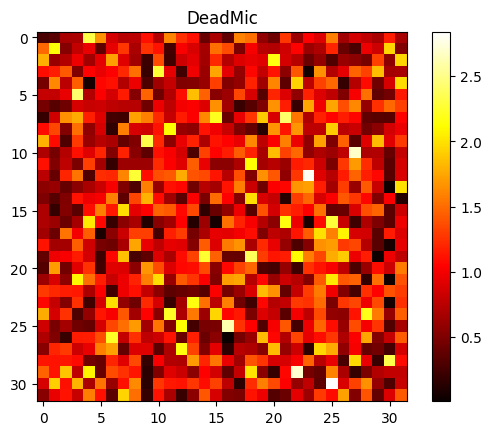

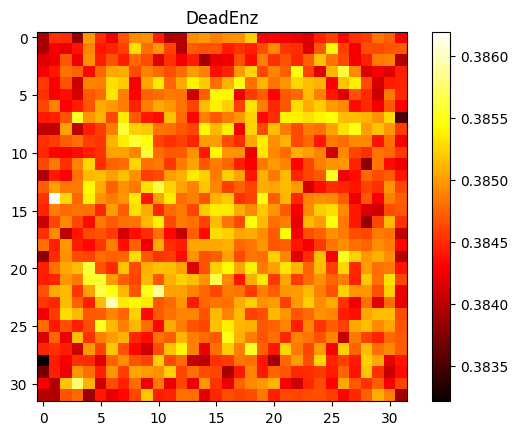

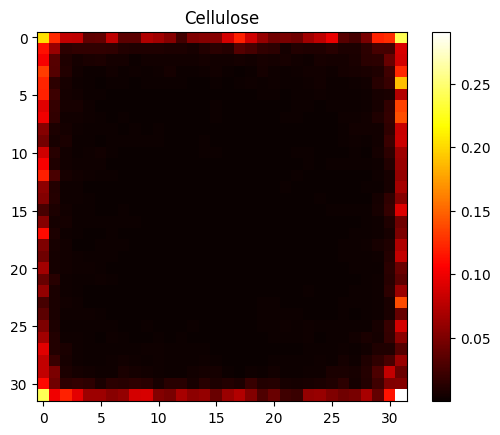

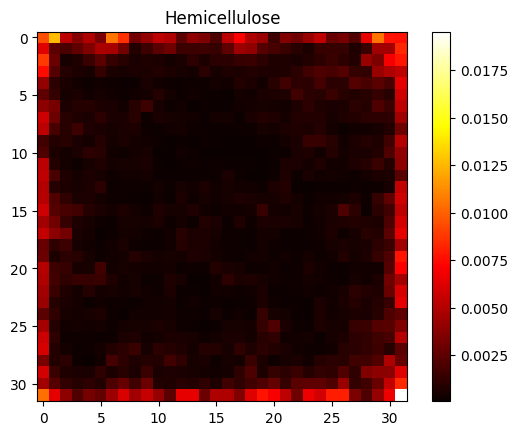

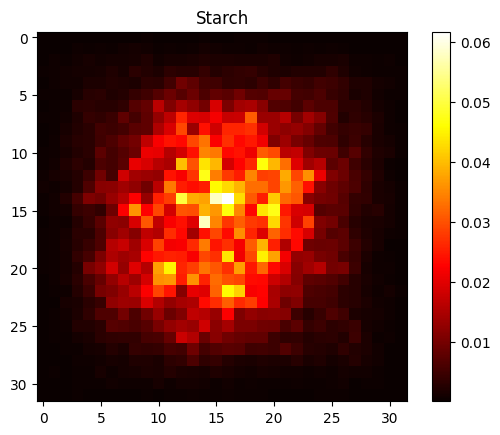

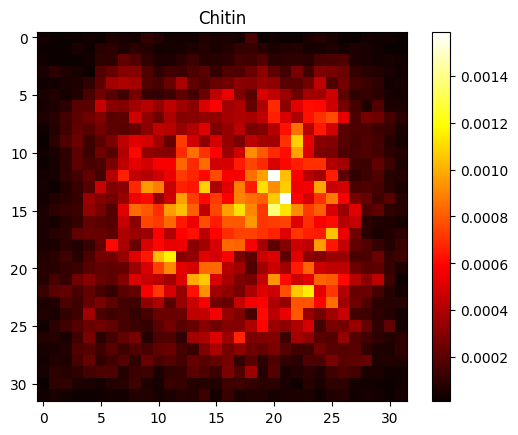

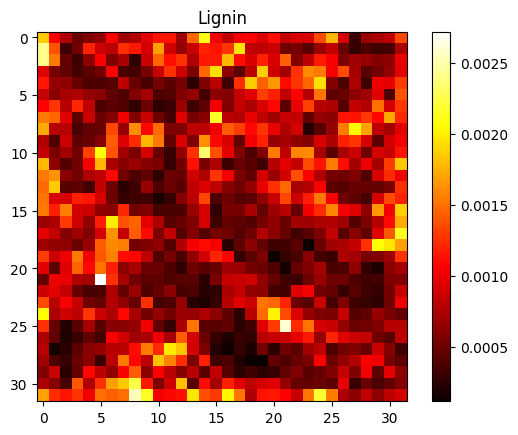

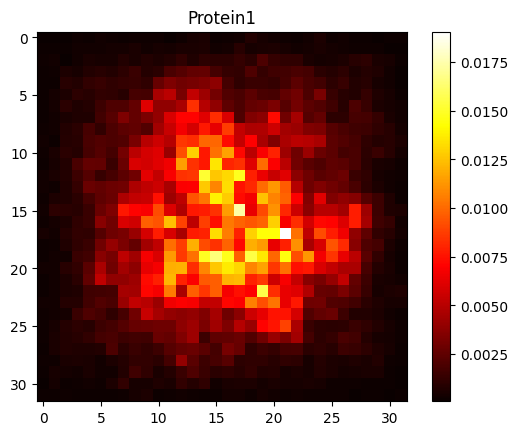

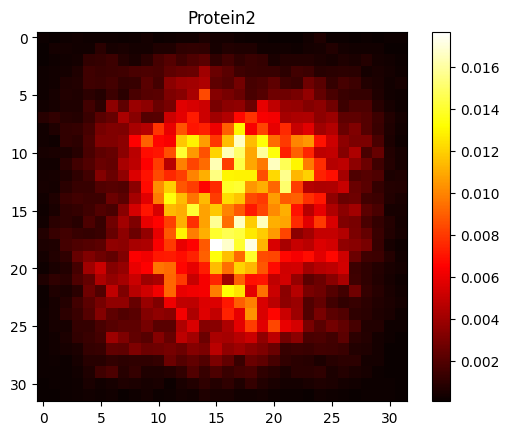

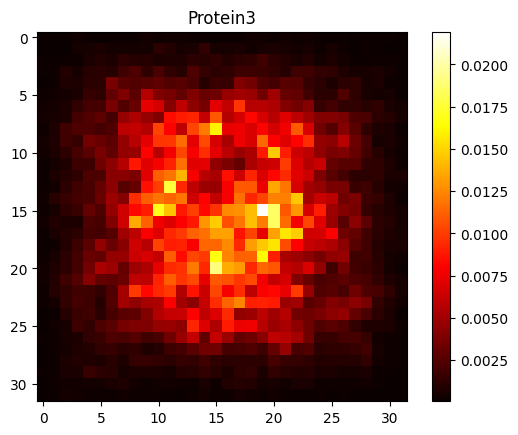

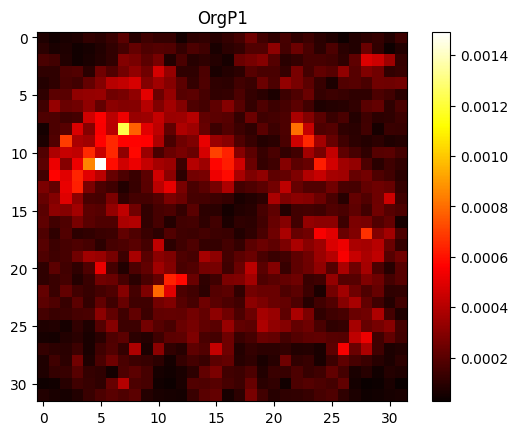

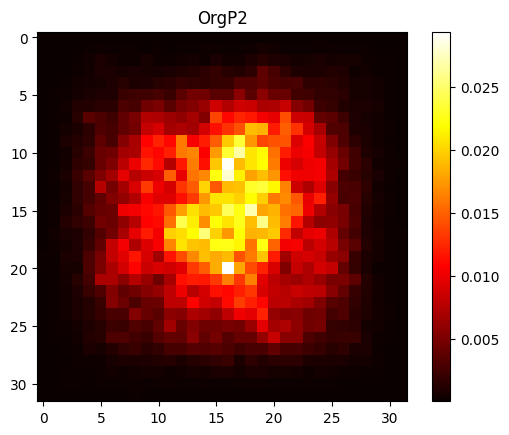

In [35]:
for isub in range(eco.substrates.n_components):
    fig, ax = plt.subplots(1,1)
    dat = eco.substrates.tmass[:,:,isub,0]
    sub_map = ax.imshow(dat, cmap='hot')
    ax.set_title(eco.substrates.names[isub])
    plt.colorbar(sub_map)

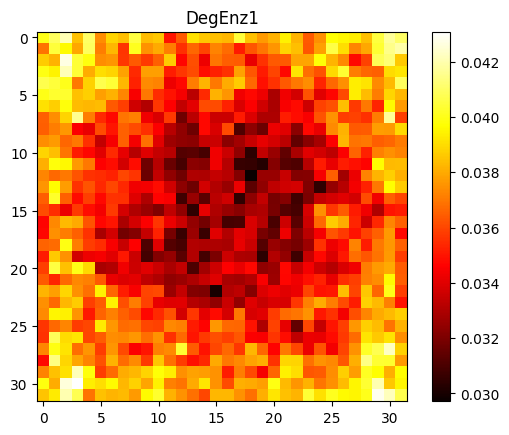

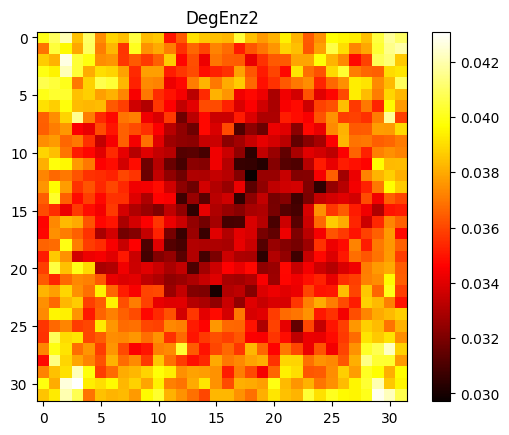

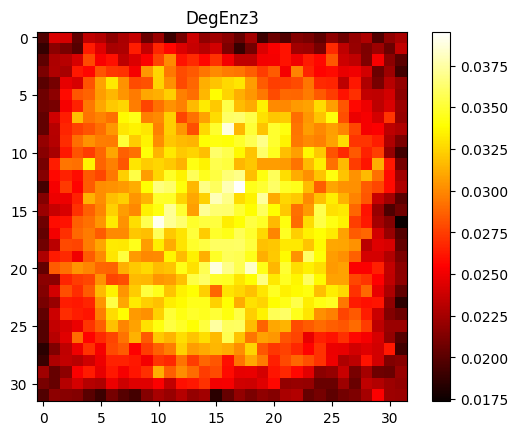

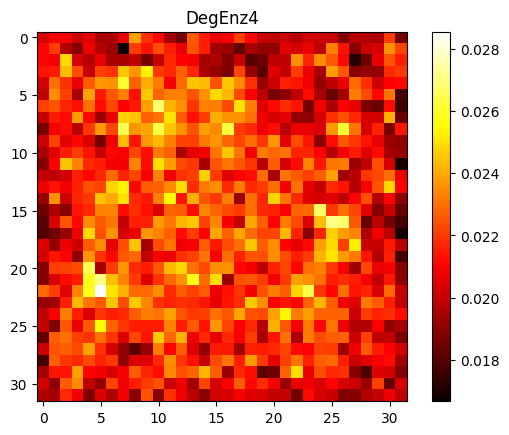

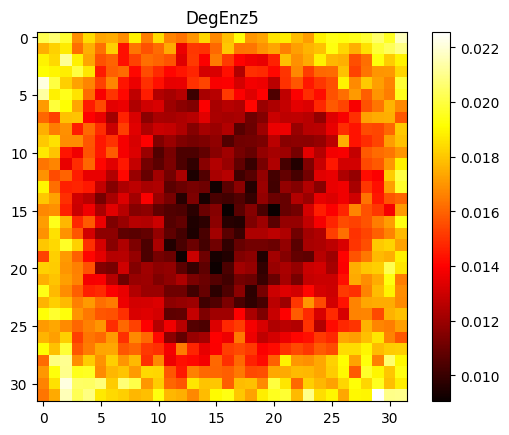

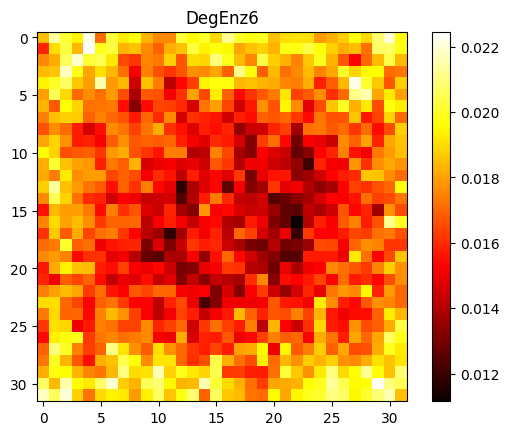

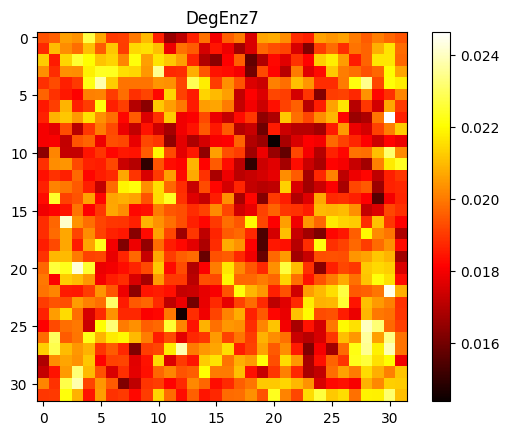

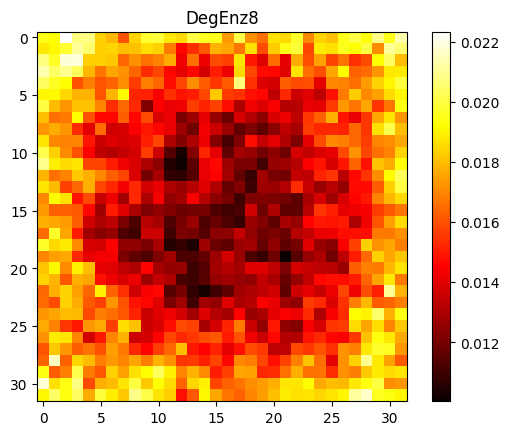

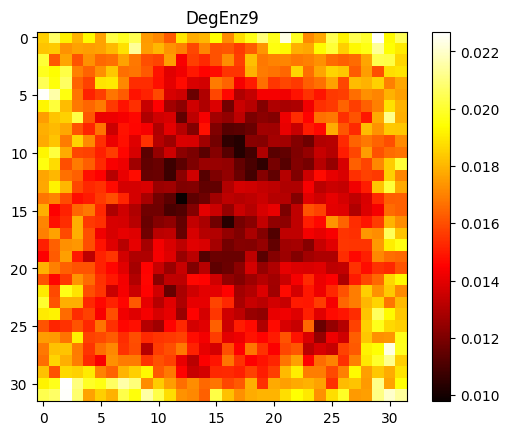

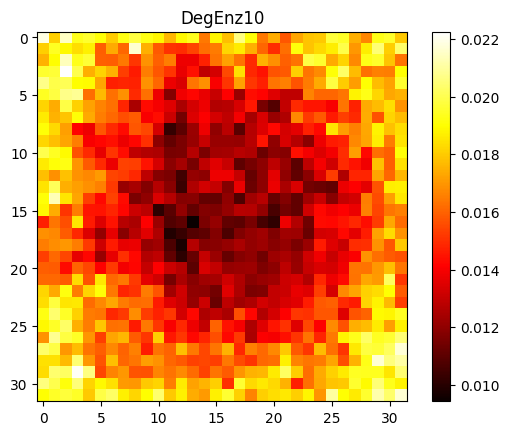

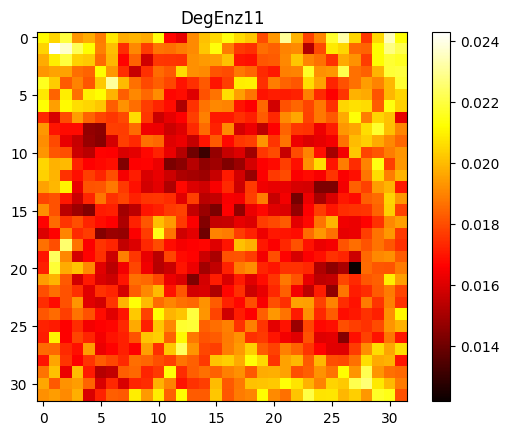

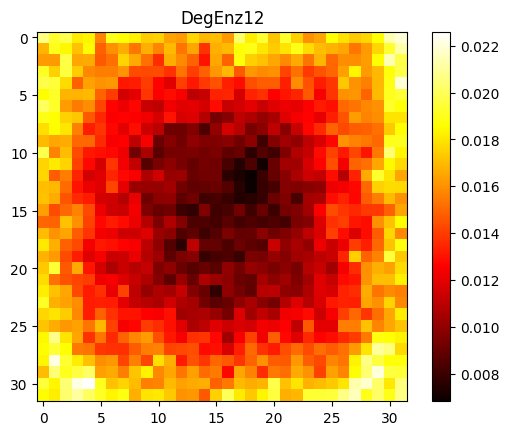

In [36]:
for ienz in range(eco.degradation_enzymes.n_components):
    fig, ax = plt.subplots(1,1)
    dat = eco.degradation_enzymes.tmass[:,:,ienz,0]
    enz_map = ax.imshow(dat, cmap='hot')
    ax.set_title(eco.degradation_enzymes.names[ienz])
    plt.colorbar(enz_map)